# 有监督学习(Supervised Learning)

## 线性回归(Linear Regression)
模型处理回归问题。

loss function
- 最小二乘法(LSE) 

    $LSE=\sum_{i=1}^{m}{(y^{(i)}-y_p^{(i)})^2}$
- 极大似然估计(MLE)

    $MLE=h_w(x^{(i)}) - \epsilon^{(i)}$
- 通过极大似然估计的loss可以推导出最小二乘法的loss

求解的常用的方法
- 解析解
- 梯度下降法

总结：
- 线性回归假设输入和输出的关系是线性的。如果原始数据不是线性的，则可以考虑是否能通过某种变化转化线性关系（比如说对数转换）。
- 线性回归的假设输入和输出变量没有噪声，所以模型本身对噪声比较敏感。在使用线性回归前，需要剔除异常值。
- 如果在输入的数据中有高度相关的数据时，线性回归将会过度拟合数据。所以需要删除这些数据，这种方法叫做删除共线性(Collinearity)。
- 在输入和输出变量符合高斯分布的时候，线性回归能够取得更可靠的预测。但是实际数据大部分都不符合高斯分布，所以在使用数据之前可以使用log或者BoxCox方法变换数据，这将会在预测上取得一些好处。预测出来的值要做反向的操作才能恢复原来的值。
- 数据的缩放将对模型的预测有正向的效果。

**Basis Expansion：**对数据进行Basic Expansion可以捕捉线性数据中的非线性的关系。比如说$X->(1,X, X^2$)代回到原来的公式中，这种叫做Polynomial Basis Expansion。当数据量很大的时候，我们可以选择很高的degree也不会过拟合。所以当前时代是个数据为王的时代。

**Fearture Crossing**:通过将特征联合起来，获取更多的数据。

SSE的问题
- 基本上随着数据的增加必然的增加，但是不代表拟合变差了
- 所以需要使用MSE
- 可以使用R square来衡量error

## 逻辑回归(Logistic Regresion)
模型处理分类问题。

**逻辑函数：**$f(x)=\frac{1}{1+e^-x}$

loss function
- 极大似然估计
- 交叉熵(用来衡量两个分布之间的距离)

常用求解方法
- 梯度下降法

多元分类的处理方法
- OVR（One Vs Rest）
- OVO(One Vs One)，通常使用该方法，对比过程纯粹
- OVR和OVO最后使用voting进行分类
- softmax是逻辑回归再多分类问题上的推广

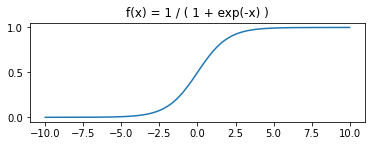

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(-10, 10, 1000)
b = 1.0 / (1.0 + np.exp(-a))
plt.subplot(2, 1, 1)
plt.title('f(x) = 1 / ( 1 + exp(-x) )')
plt.plot(a, b)
plt.show()

## 树相关算法

## 决策树
- 根据不同的启发函数，寻找最好的attribute进行分裂

![decision-tree.png](assets/decision-tree.png)

### 数学基础
- 信息熵(Entropy)：信息越混乱则该值越高，越不混乱(纯粹)则该值越低

$H(X)=-\sum p_k\log(p_k)$
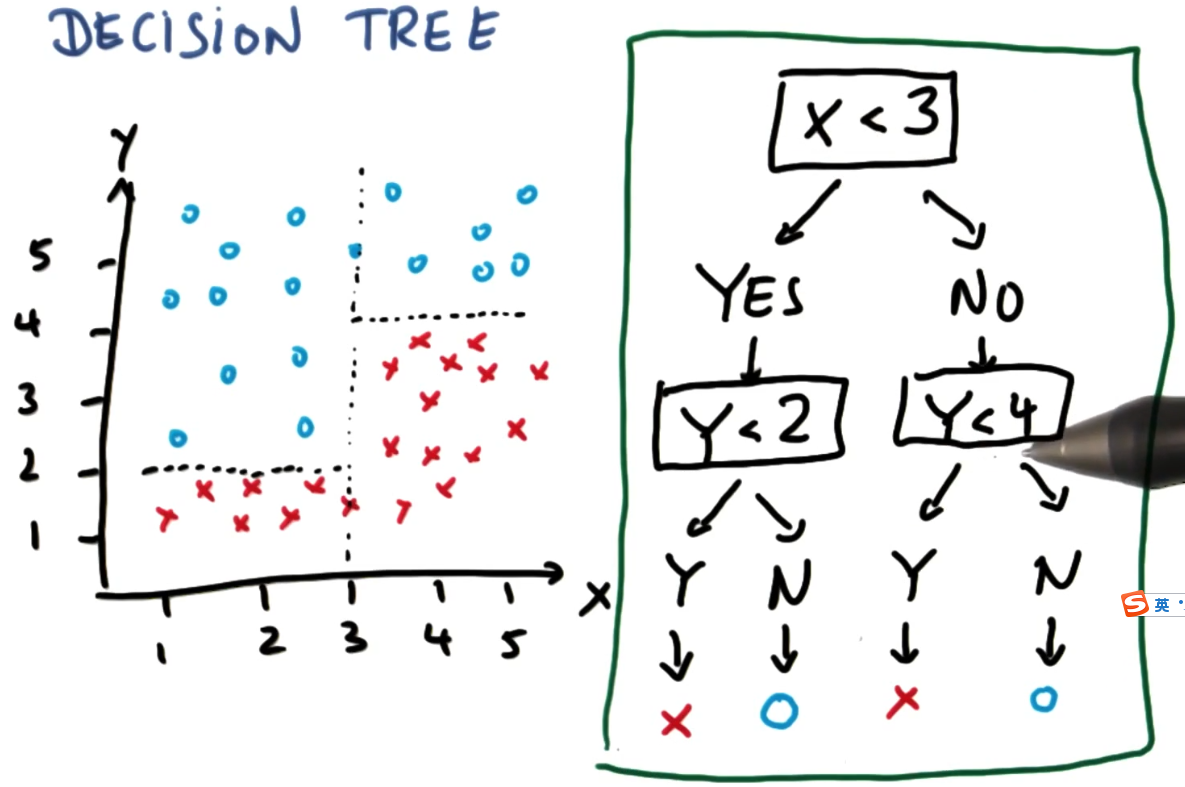

In [7]:
# 计算信息熵
import numpy as np

pro = [4, 3, 2]
pk = pro/np.sum(pro)
hx = -np.sum(pk * np.log2(pk))
print(hx)

1.5304930567574824


- 条件熵：在某些条件下，熵的大小。已知随机变量X的条件下随机变量Y的不确定性。

$H(Y|X) = \sum p(x)H(Y|X = x)$

![entropy-example.png](assets/entropy-example.png)
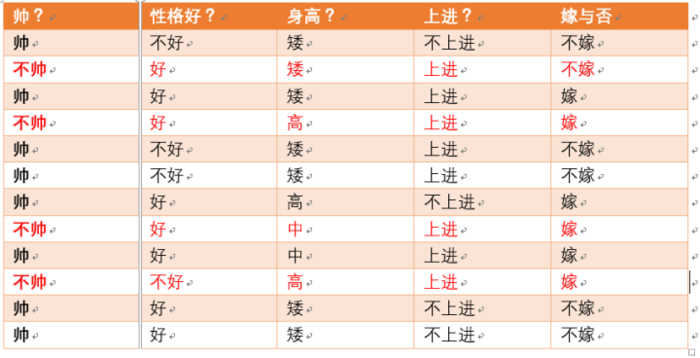

In [8]:
# 计算条件信息熵
import numpy as np

# 我们想要求出当已知长相的条件下的条件熵。
# H（Y|X=长相） = p(X=帅)*H（Y|X=帅）+ p(X=不帅)*H（Y|X=不帅）
h_shuai = -5/8*np.log2(5/8) - 3/8*np.log2(3/8)
h_noshuai =  -1/4*np.log2(1/4) - 3/4*np.log2(3/4)
Hx = 1/3 * h_noshuai + 2/3 * h_shuai
print(Hx)

0.9067153767696875


- 信息增益：信息熵减少的值。
- $InformationGain=Entropy(parent)-[weighted average]*Entropy(children)$

![information-gain.png](assets/information-gain.png)
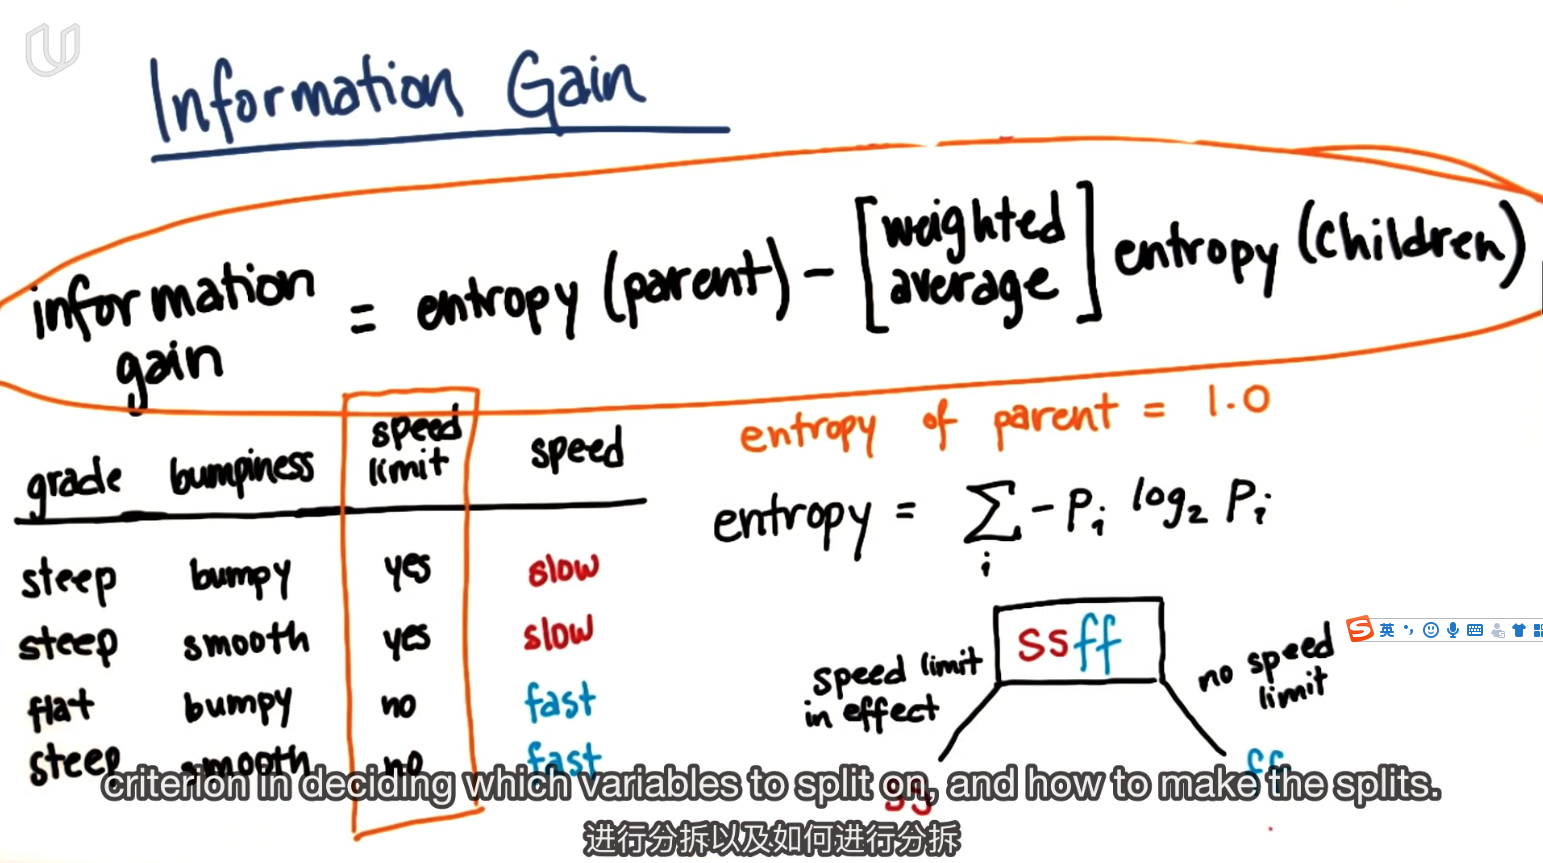

### ID3

特点：
- 信息增益
- 多分叉
- 特征不能复用
- 缺失值无处理

缺点：
- 由于信息熵的计算特性，ID3会优先选择有取值较多的属性进行分类。
- 在顶部倾向于更好的特征分类，树会很短
- 对缺失值敏感

### C4.5

特点：
- 信息增益率
- 多分叉
- 特征不能复用
- 缺失值有处理
- 连续变量切分为bool型

缺点：
- log的计算非常缓慢

### CART

特点：
- 基尼系数
- 二叉树
- 特征可以复用
- 连续值有处理
- 连续变量切分为bool型
- 可以使用mse/mae进行回归问题的处理
- 目前主流方法
- 无限生长，容易过拟合，依赖剪枝技术

缺点：
- 如果无限制的生长，很容易发生过拟合

### 决策树剪枝
由于决策树完全生长很容易过拟合，所以需要进行剪枝。

#### 预剪枝
在树中的节点扩展之前，先计算当前的划分能否带来模型泛化能力的提升，如果不能，则不再继续生长子树。此时叶子结点中可能存在多种不同分类，使用投票法来决定类别。

停止条件：
- 当树深达到一定数量的时候停止生长
- 当到达当前节点的数量小于某个阈值时，停止树的生长。
- 计算每次分裂对测试集的准确提升，当小于某个阈值时不再生长

特点：
- 思想直接、算法简单、效率高，适合大规模的问题
- 但是上述参数的选择需要经验的积累，很容易就欠拟合了

#### 后剪枝
让算法生成一颗完全生长的决策树，然后从最底层向上剪枝,剪枝的依据就是以下几种方法的核心。此时叶子结点中可能存在多种不同分类，使用投票法来决定类别。

常用的方法：
- REP
- CCP(CART)
- MEP
- CVP
- OPP

特点：
- 相比预剪枝，后剪枝可以得到泛化能力更强的决策树，但时间的开销会更大。
- 可以结合交叉验证，在验证集上验证剪枝的效果

> **奥卡姆剃刀**：如果有一个简单的方法和一个复杂的方法能够达到同样的效果，我们选择简单的那个。因为简单的寻选择是巧合的几率更小，更有可能反应事务的内在规律。

## 支持向量机(SVM)

- SVM寻找最优的分界面，为了能够更好的避免过拟合
- Kernel Trick使得SVM可以用来解决线性不可分的问题

优点：
- 理论非常完美，比神经网络优雅，因为神经网络不是convex的，不是必然能找到全局最优解的
- 支持不同kernel

缺点：
- 当数据量特别大的时候，训练比较慢

### 凸函数优化问题primal - dual和KKT条件

![primal-dual1.jpg](assets/primal-dual1.jpg)

![primal-dual2.jpg](assets/primal-dual2.jpg)

![kkt1.jpg](assets/kkt1.jpg)

![kkt2.jpg](assets/kkt2.jpg)

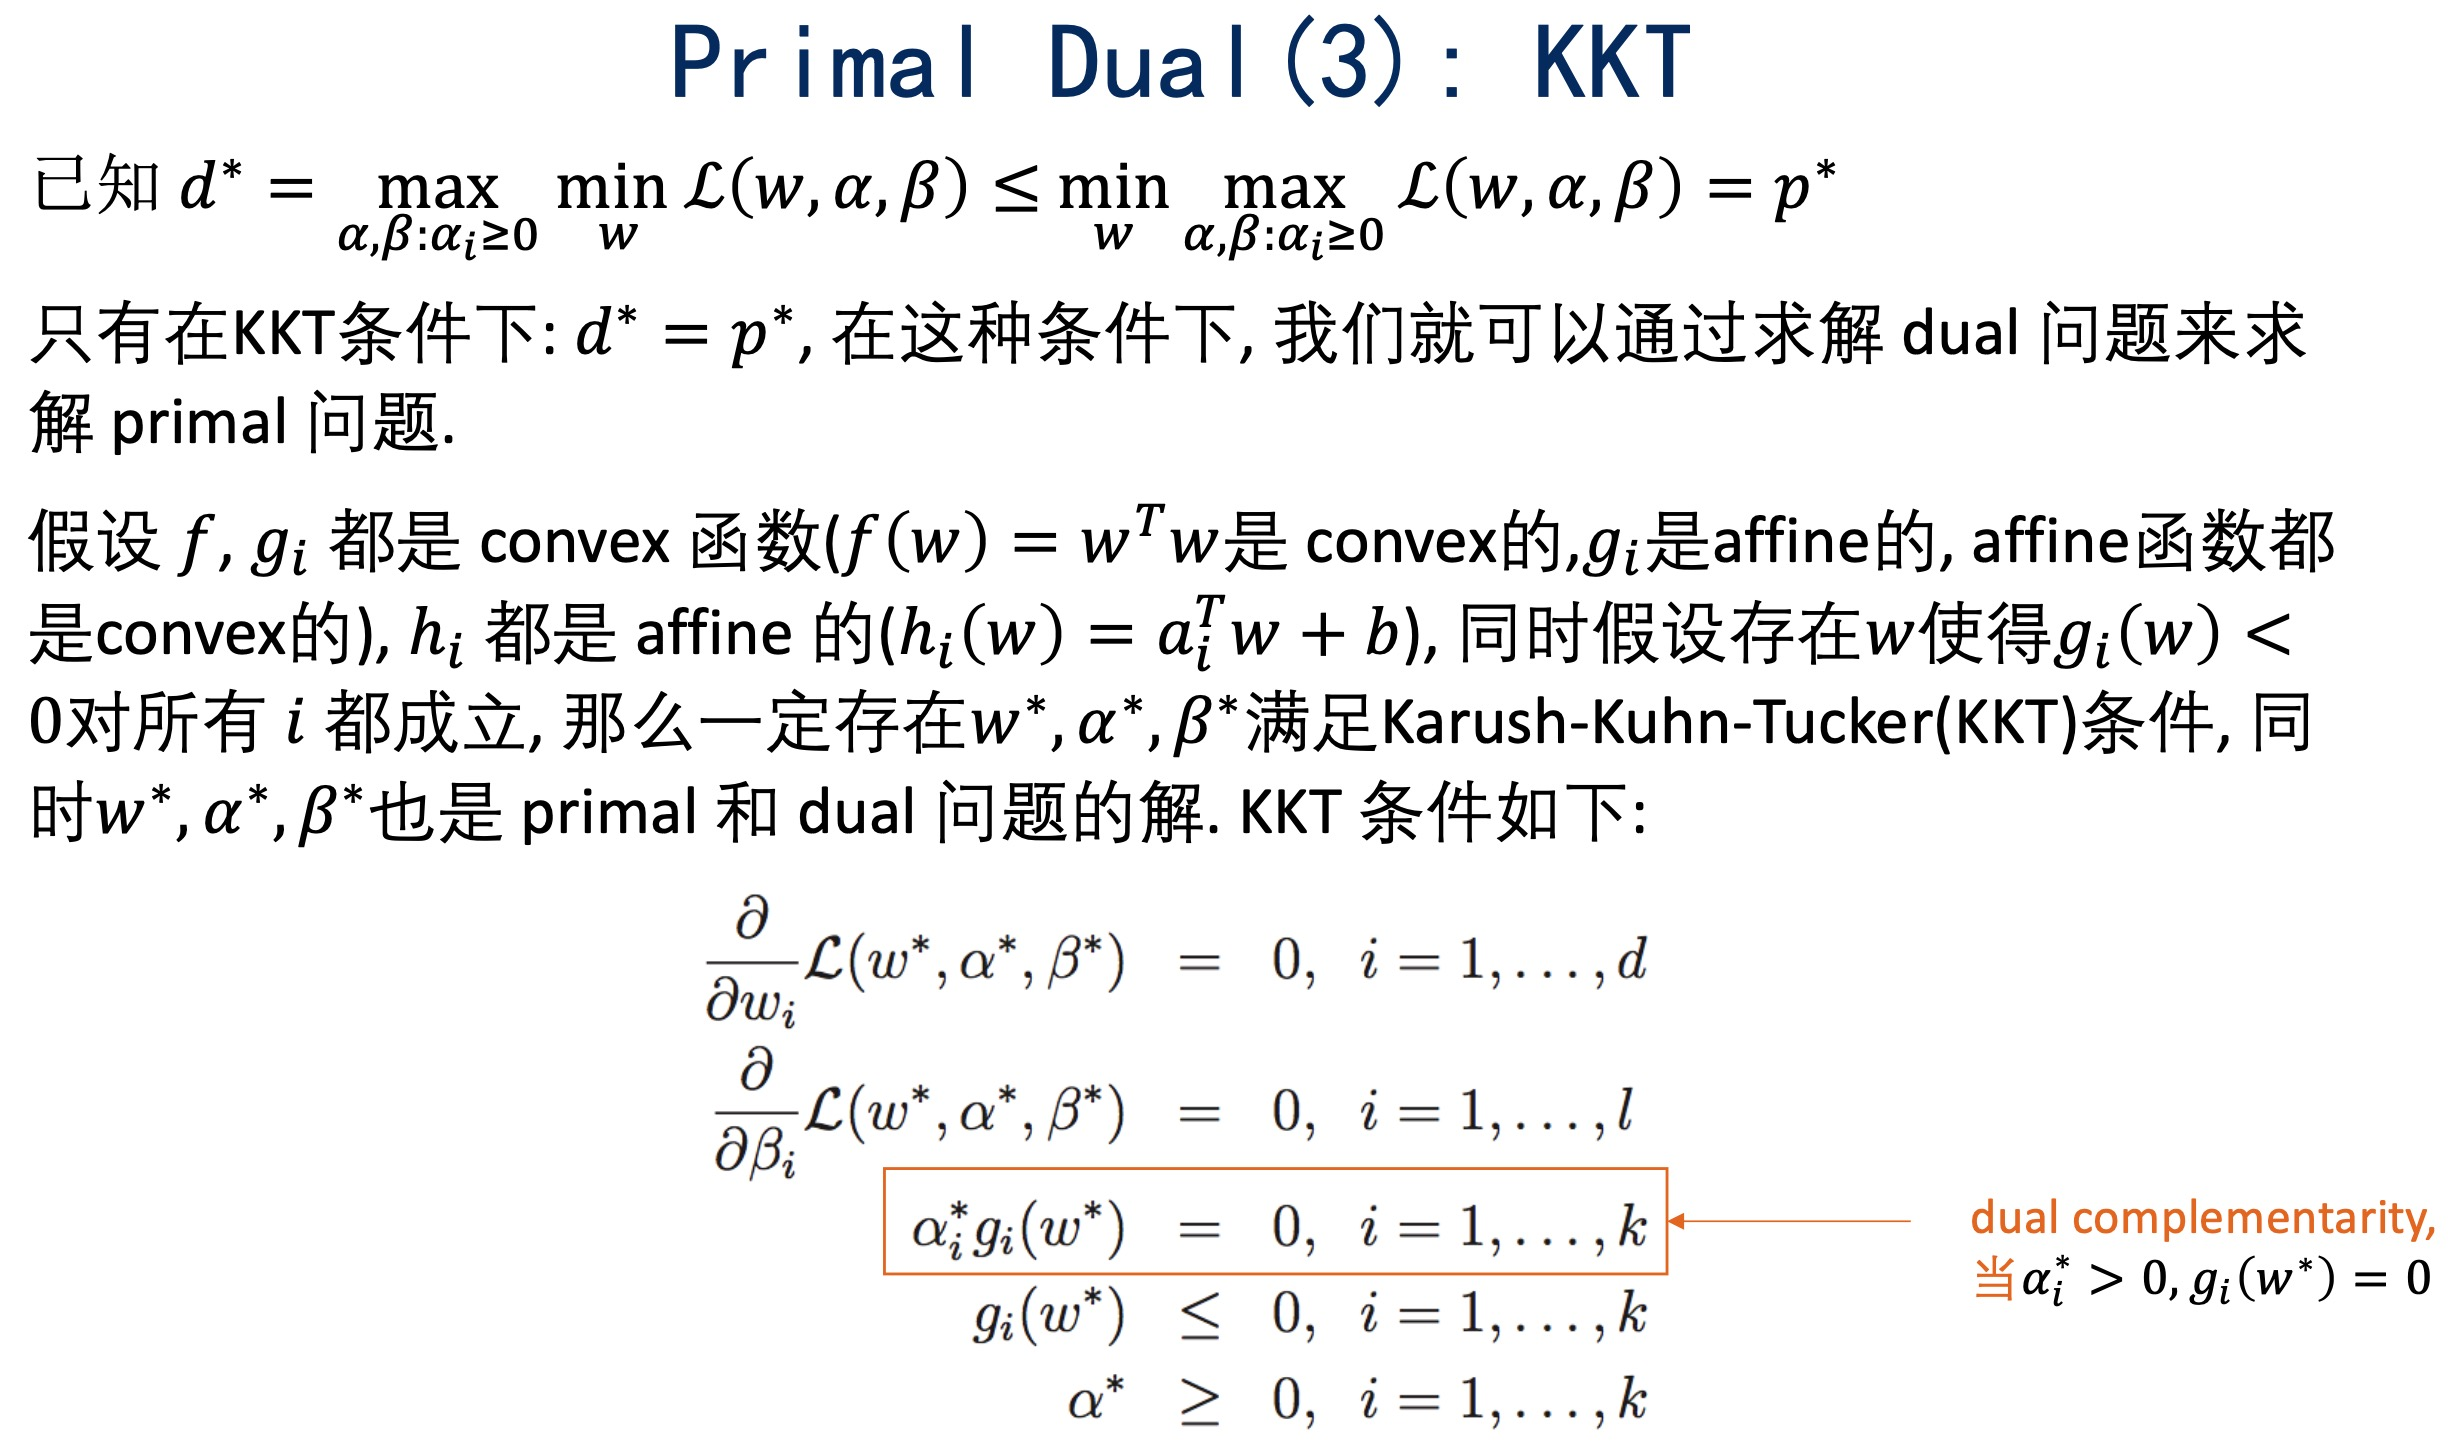
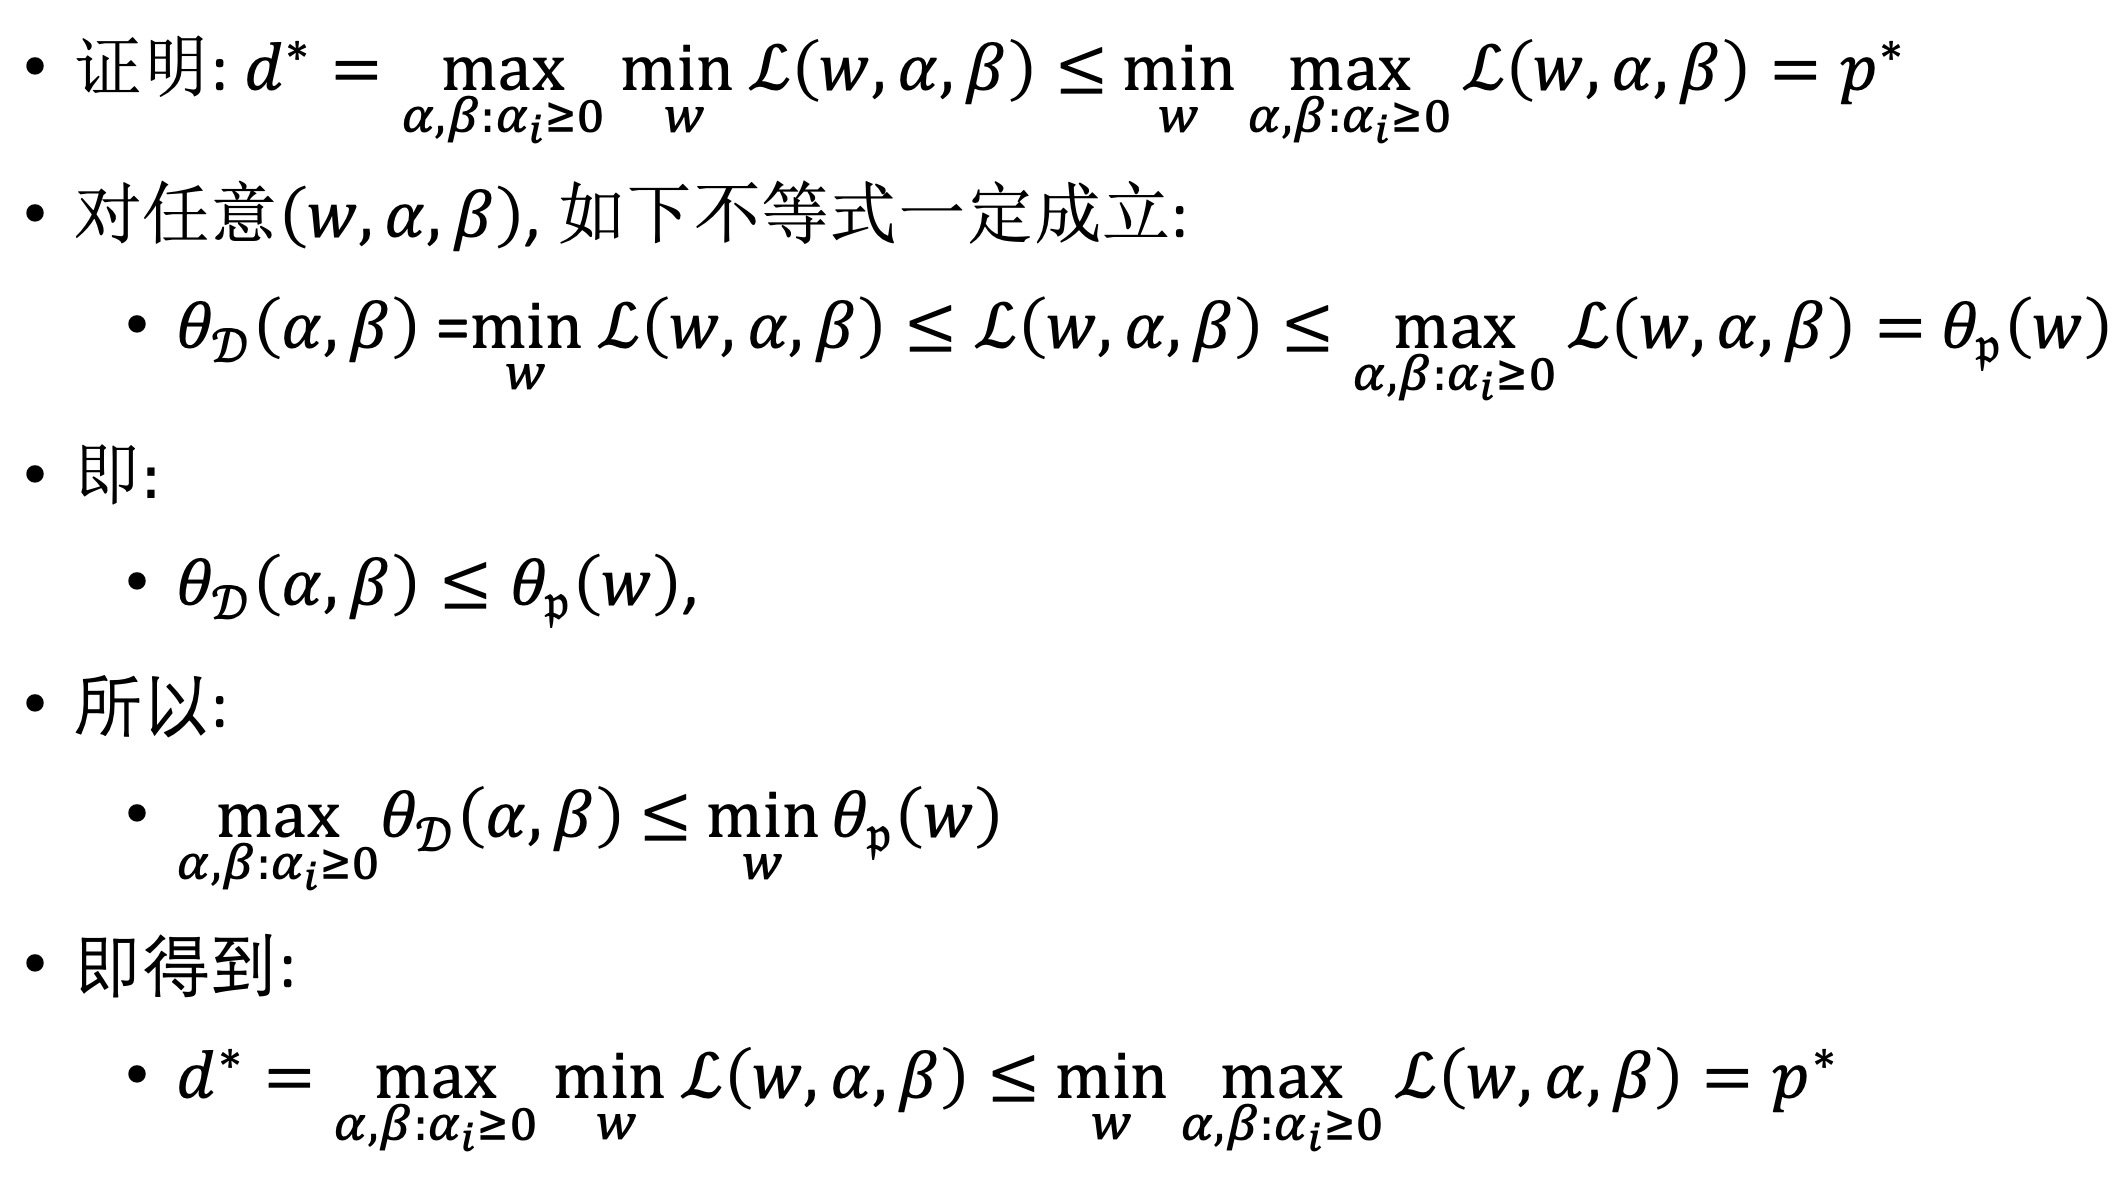
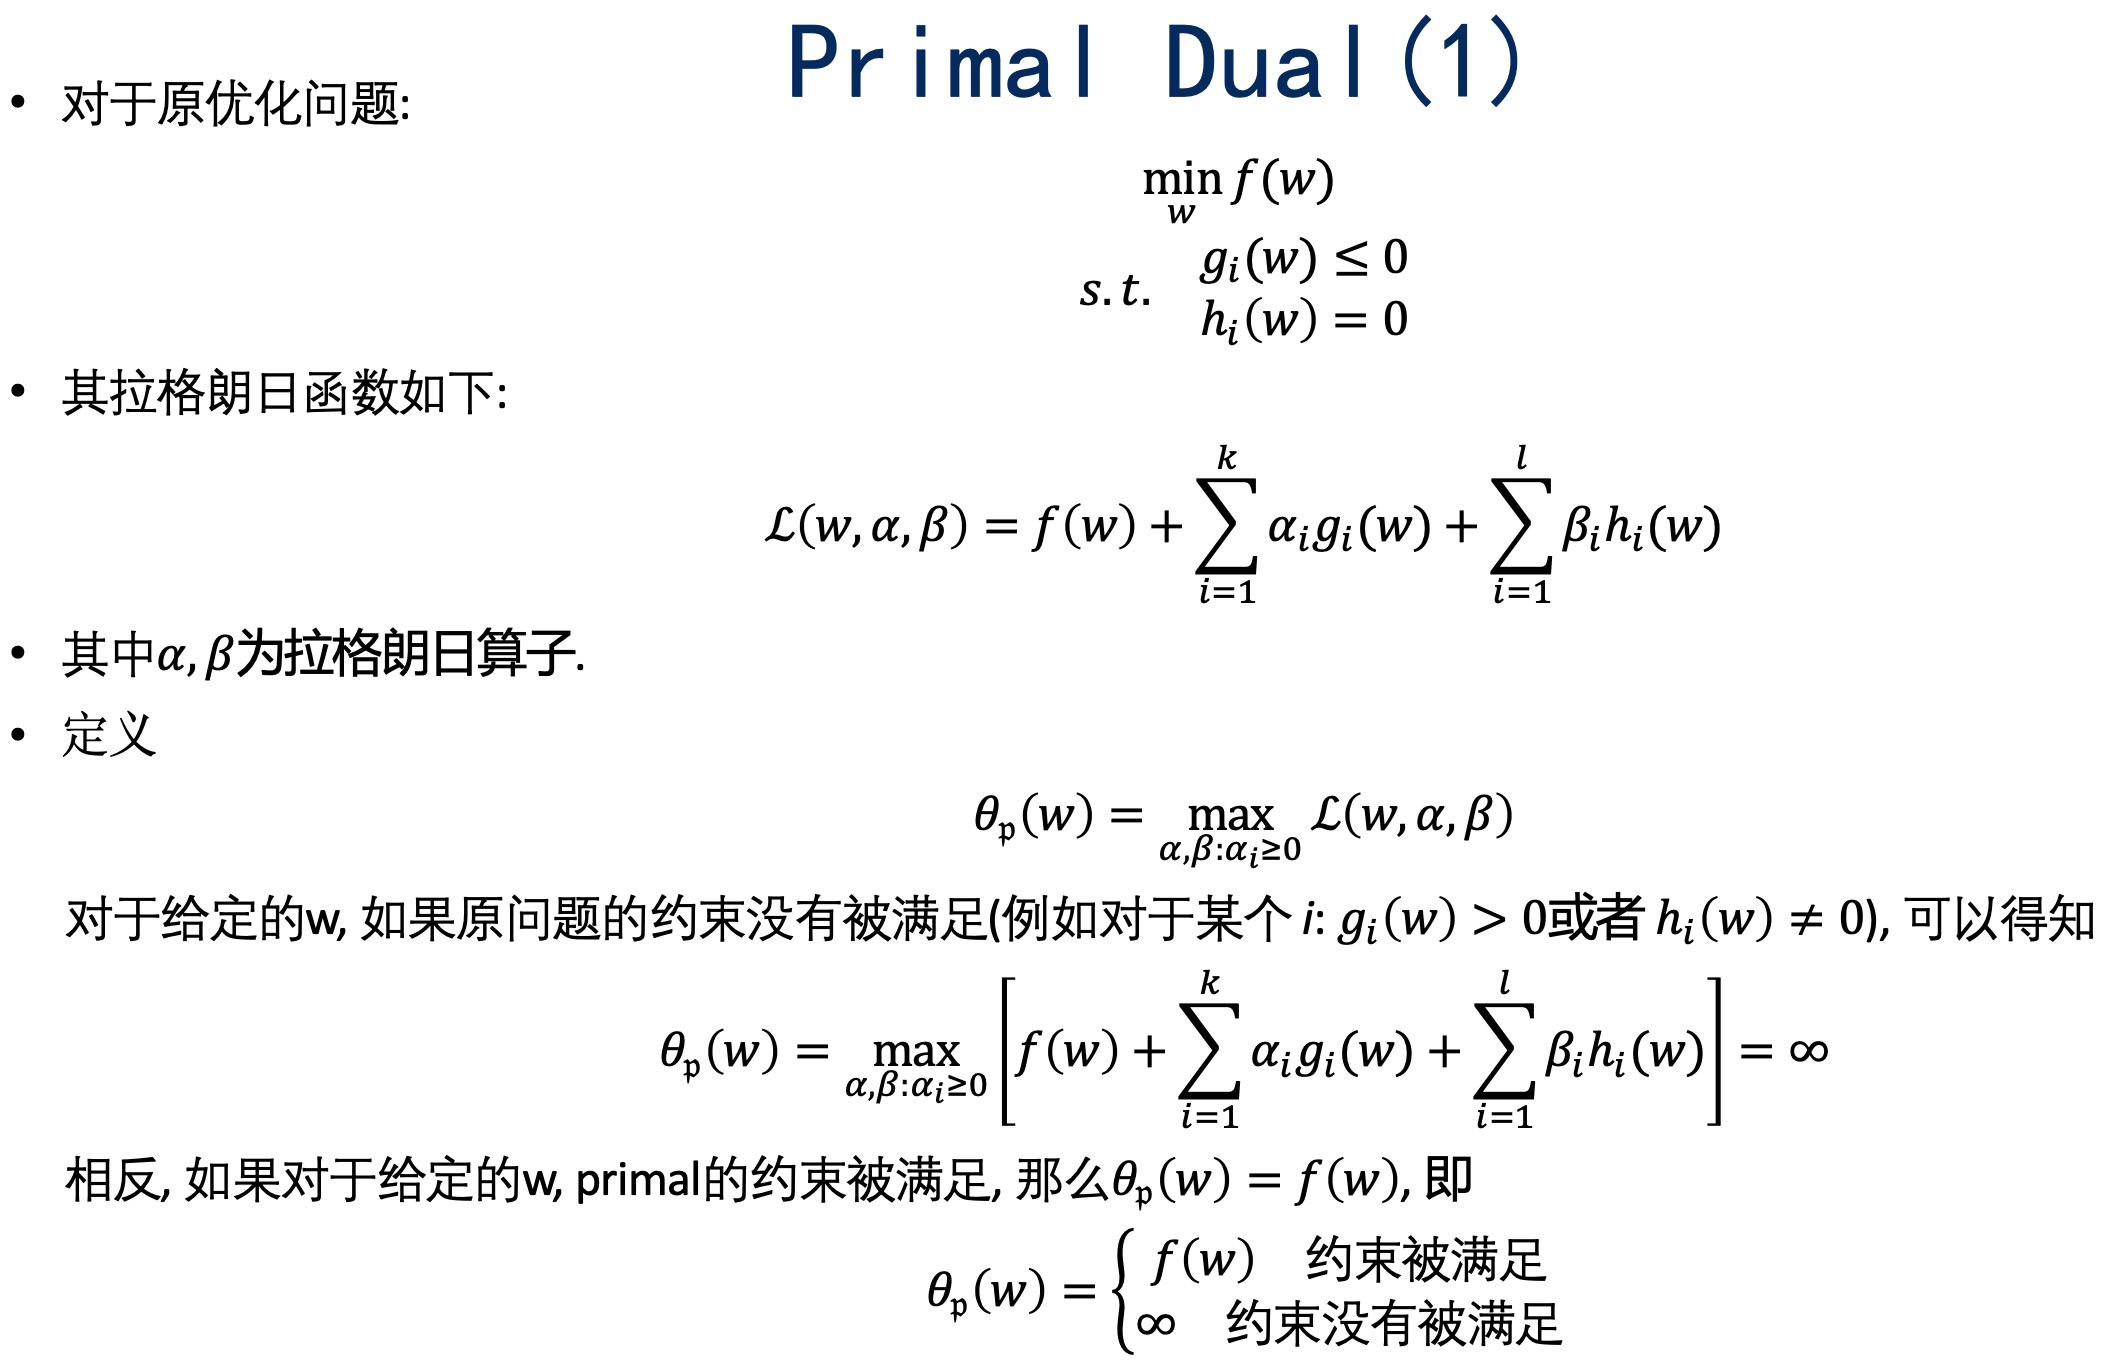
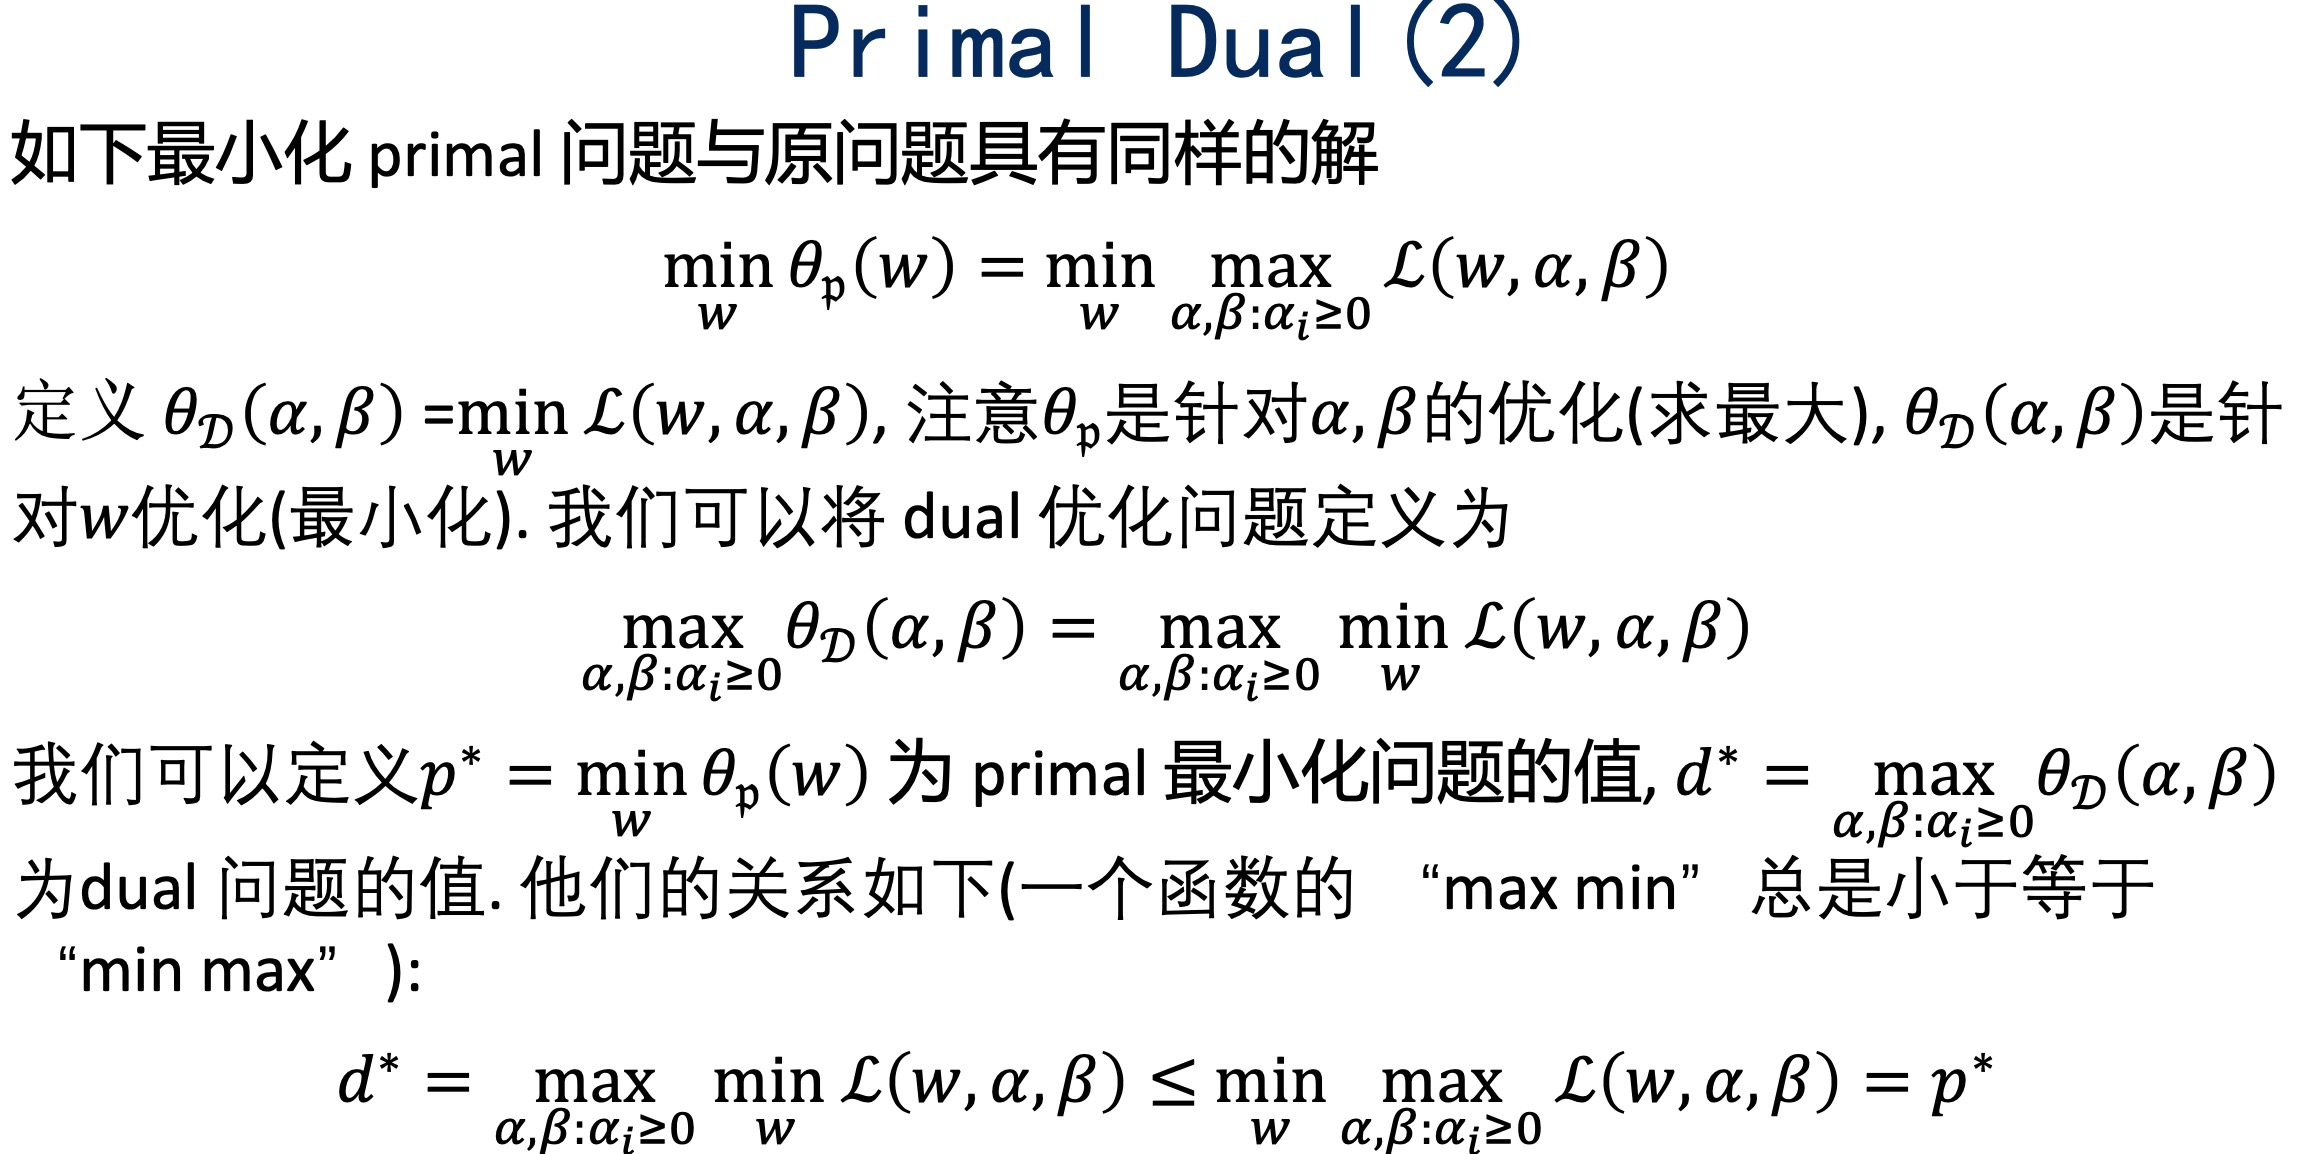

### 线性SVM
![linear-svm1.jpg](assets/linear-svm1.jpg)

![linear-svm2.jpg](assets/linear-svm2.jpg)

![linear-svm3.jpg](assets/linear-svm3.jpg)

![linear-svm4.jpg](assets/linear-svm4.jpg)
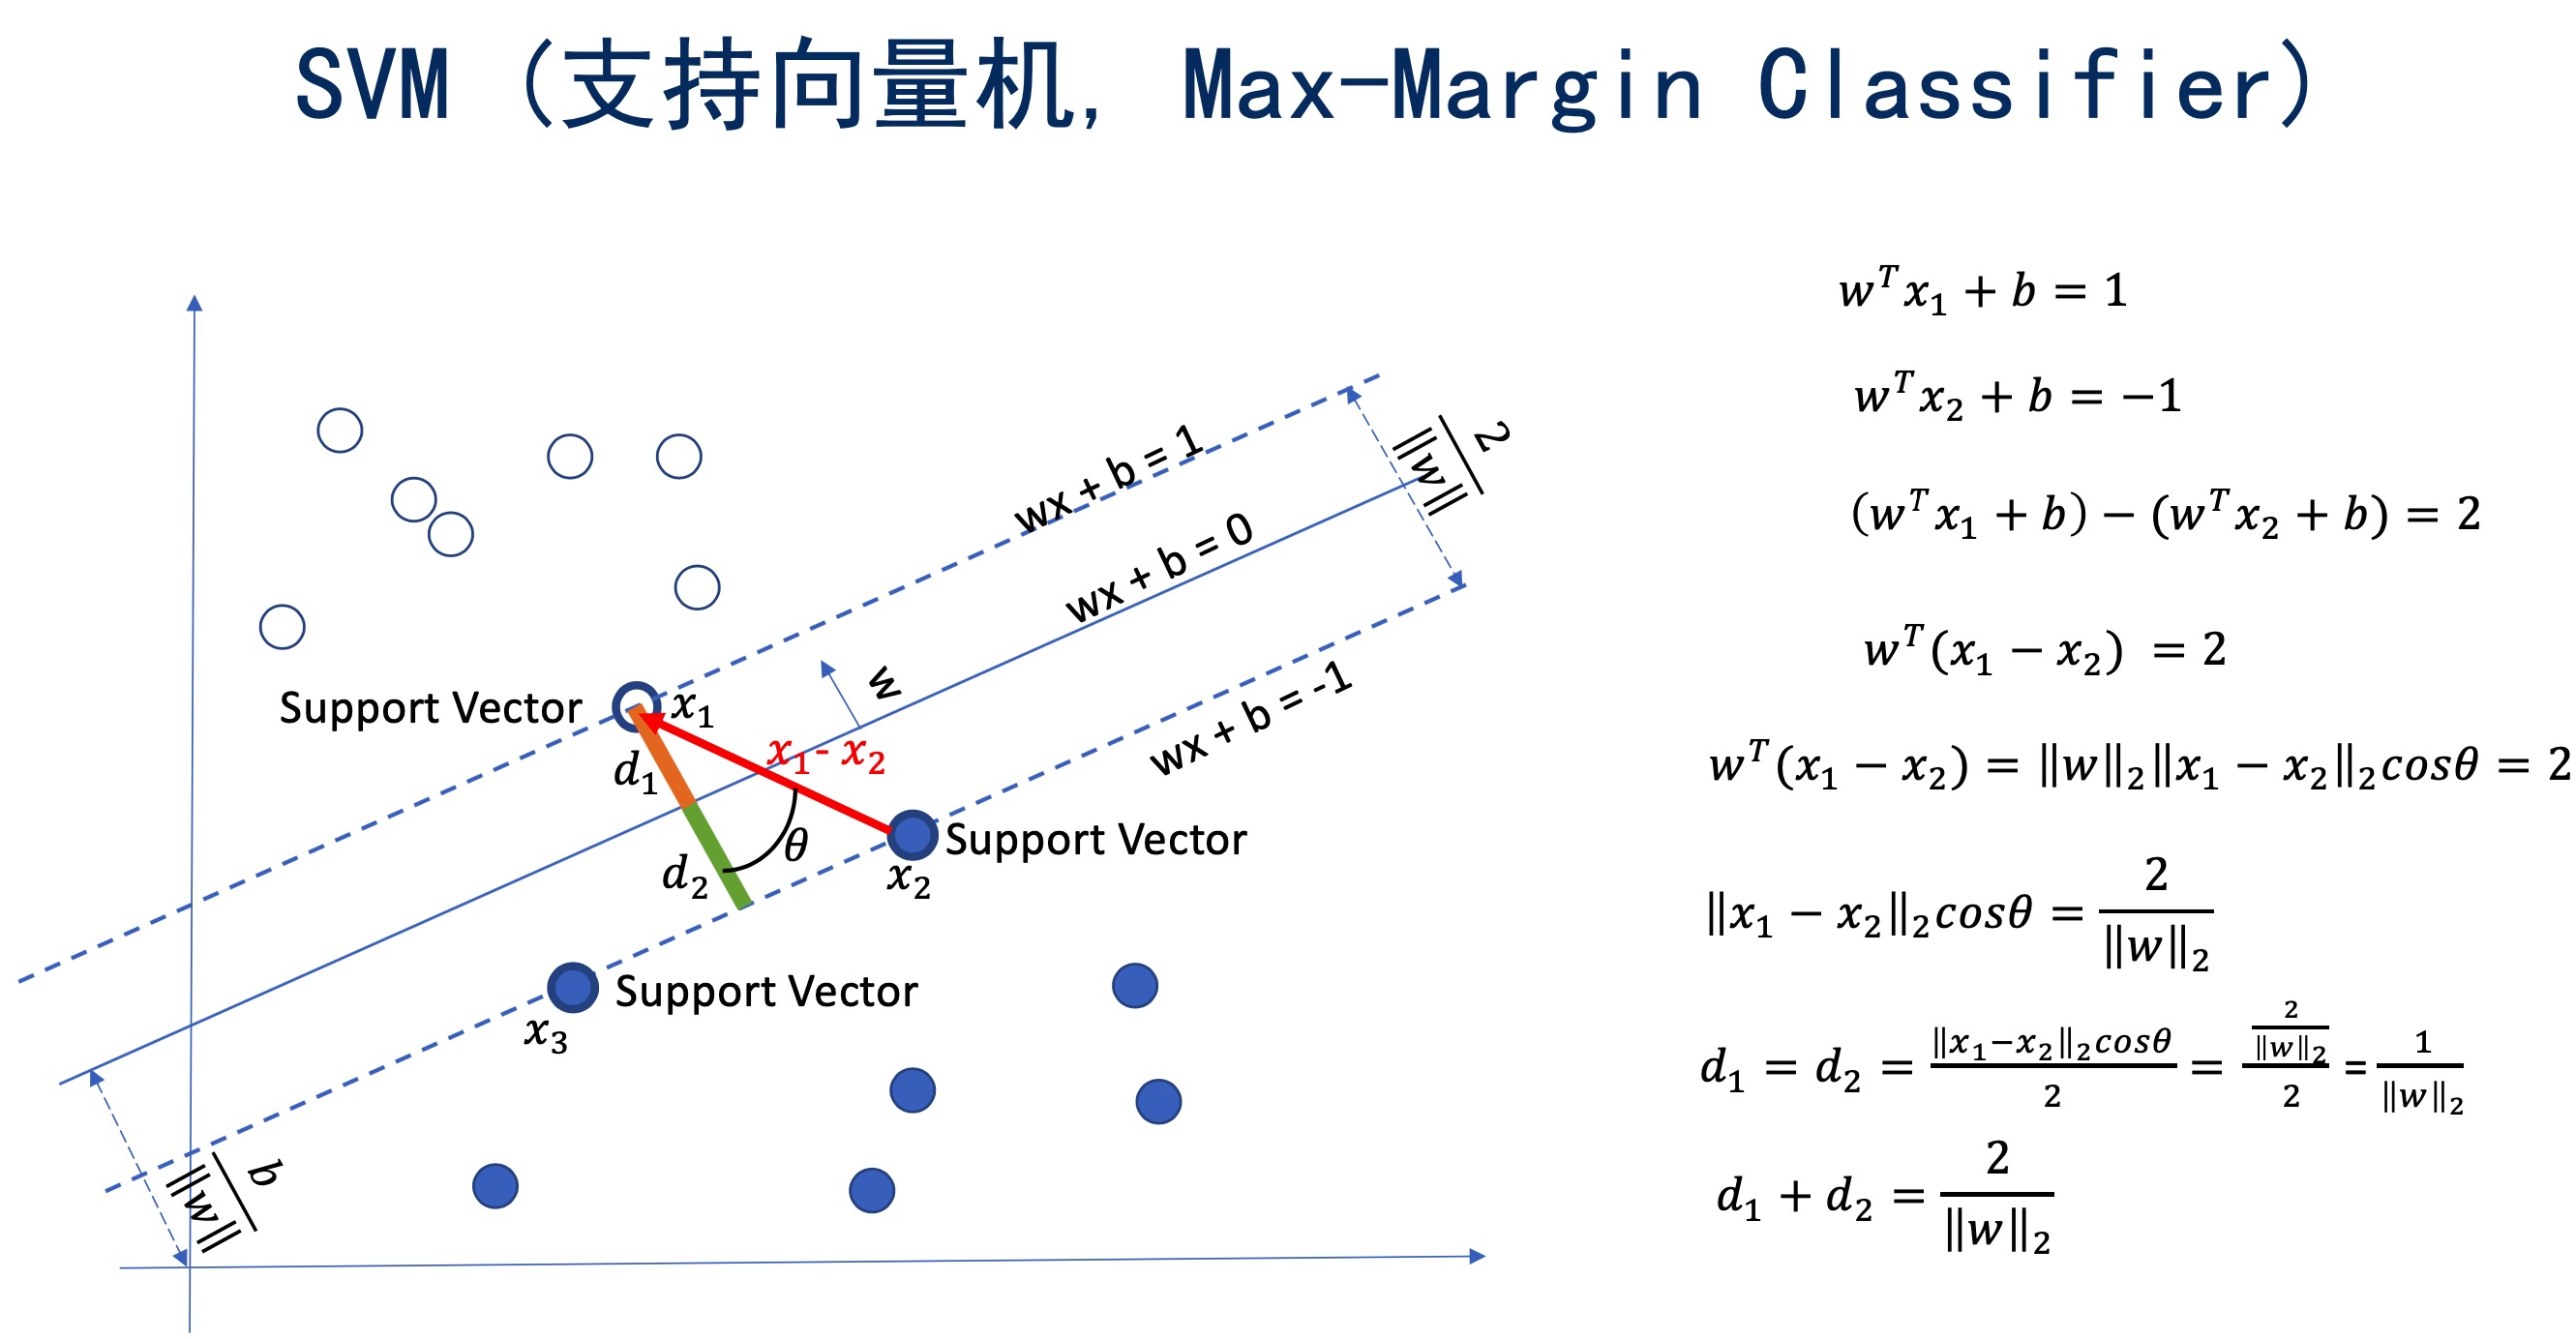
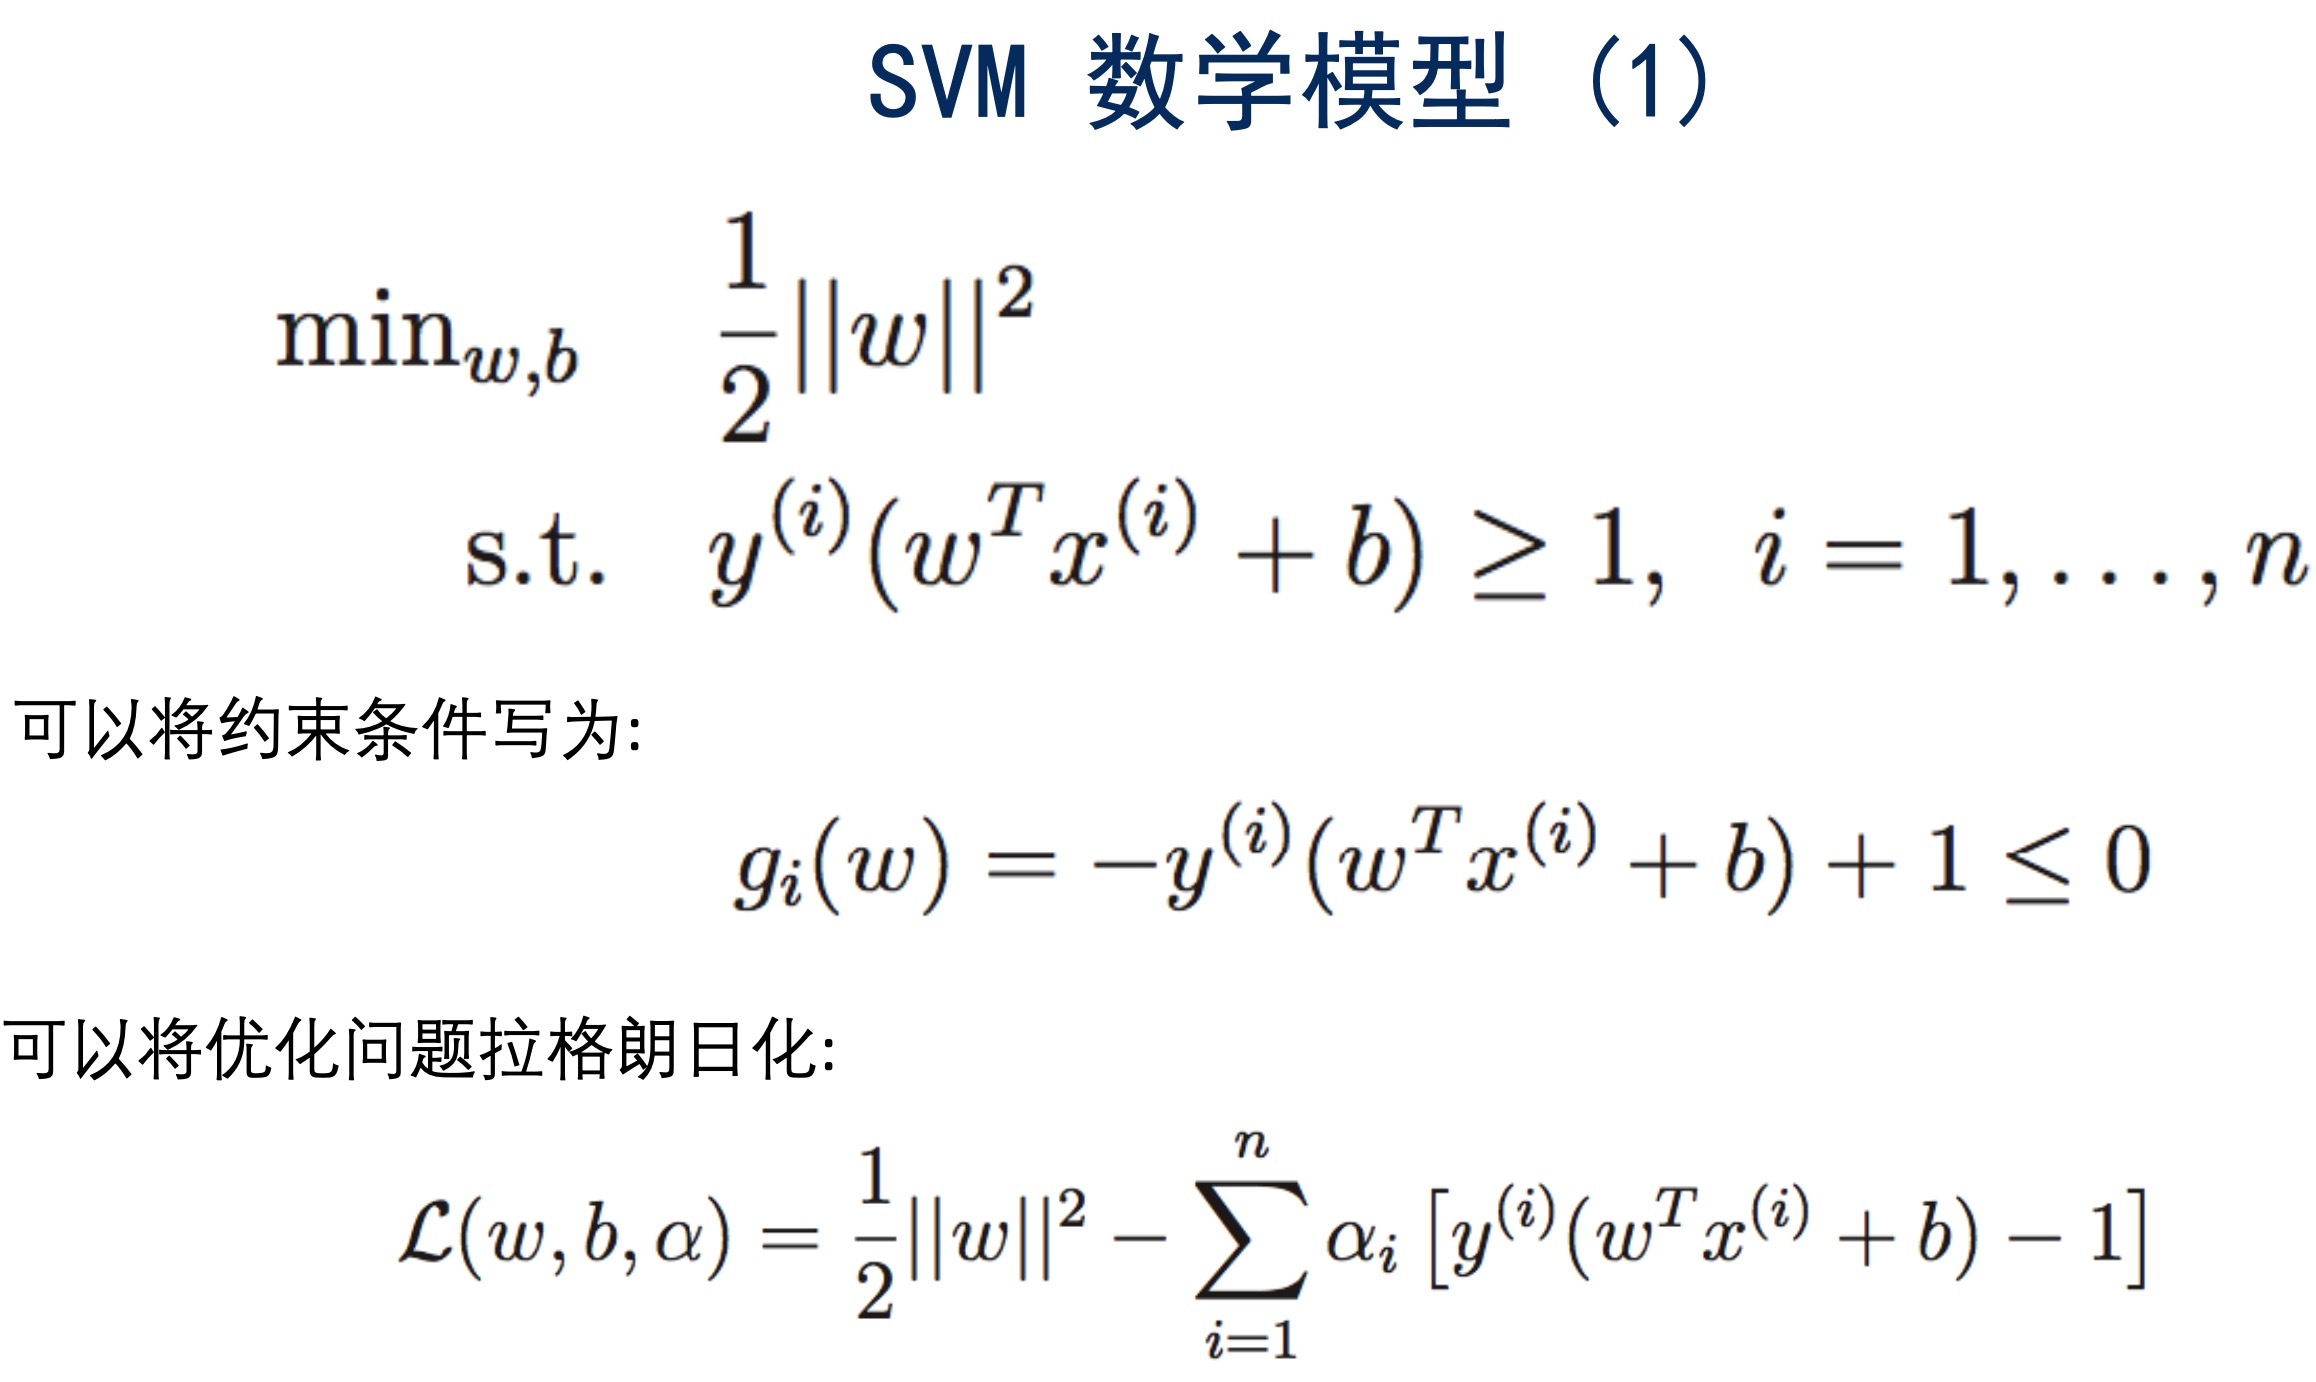
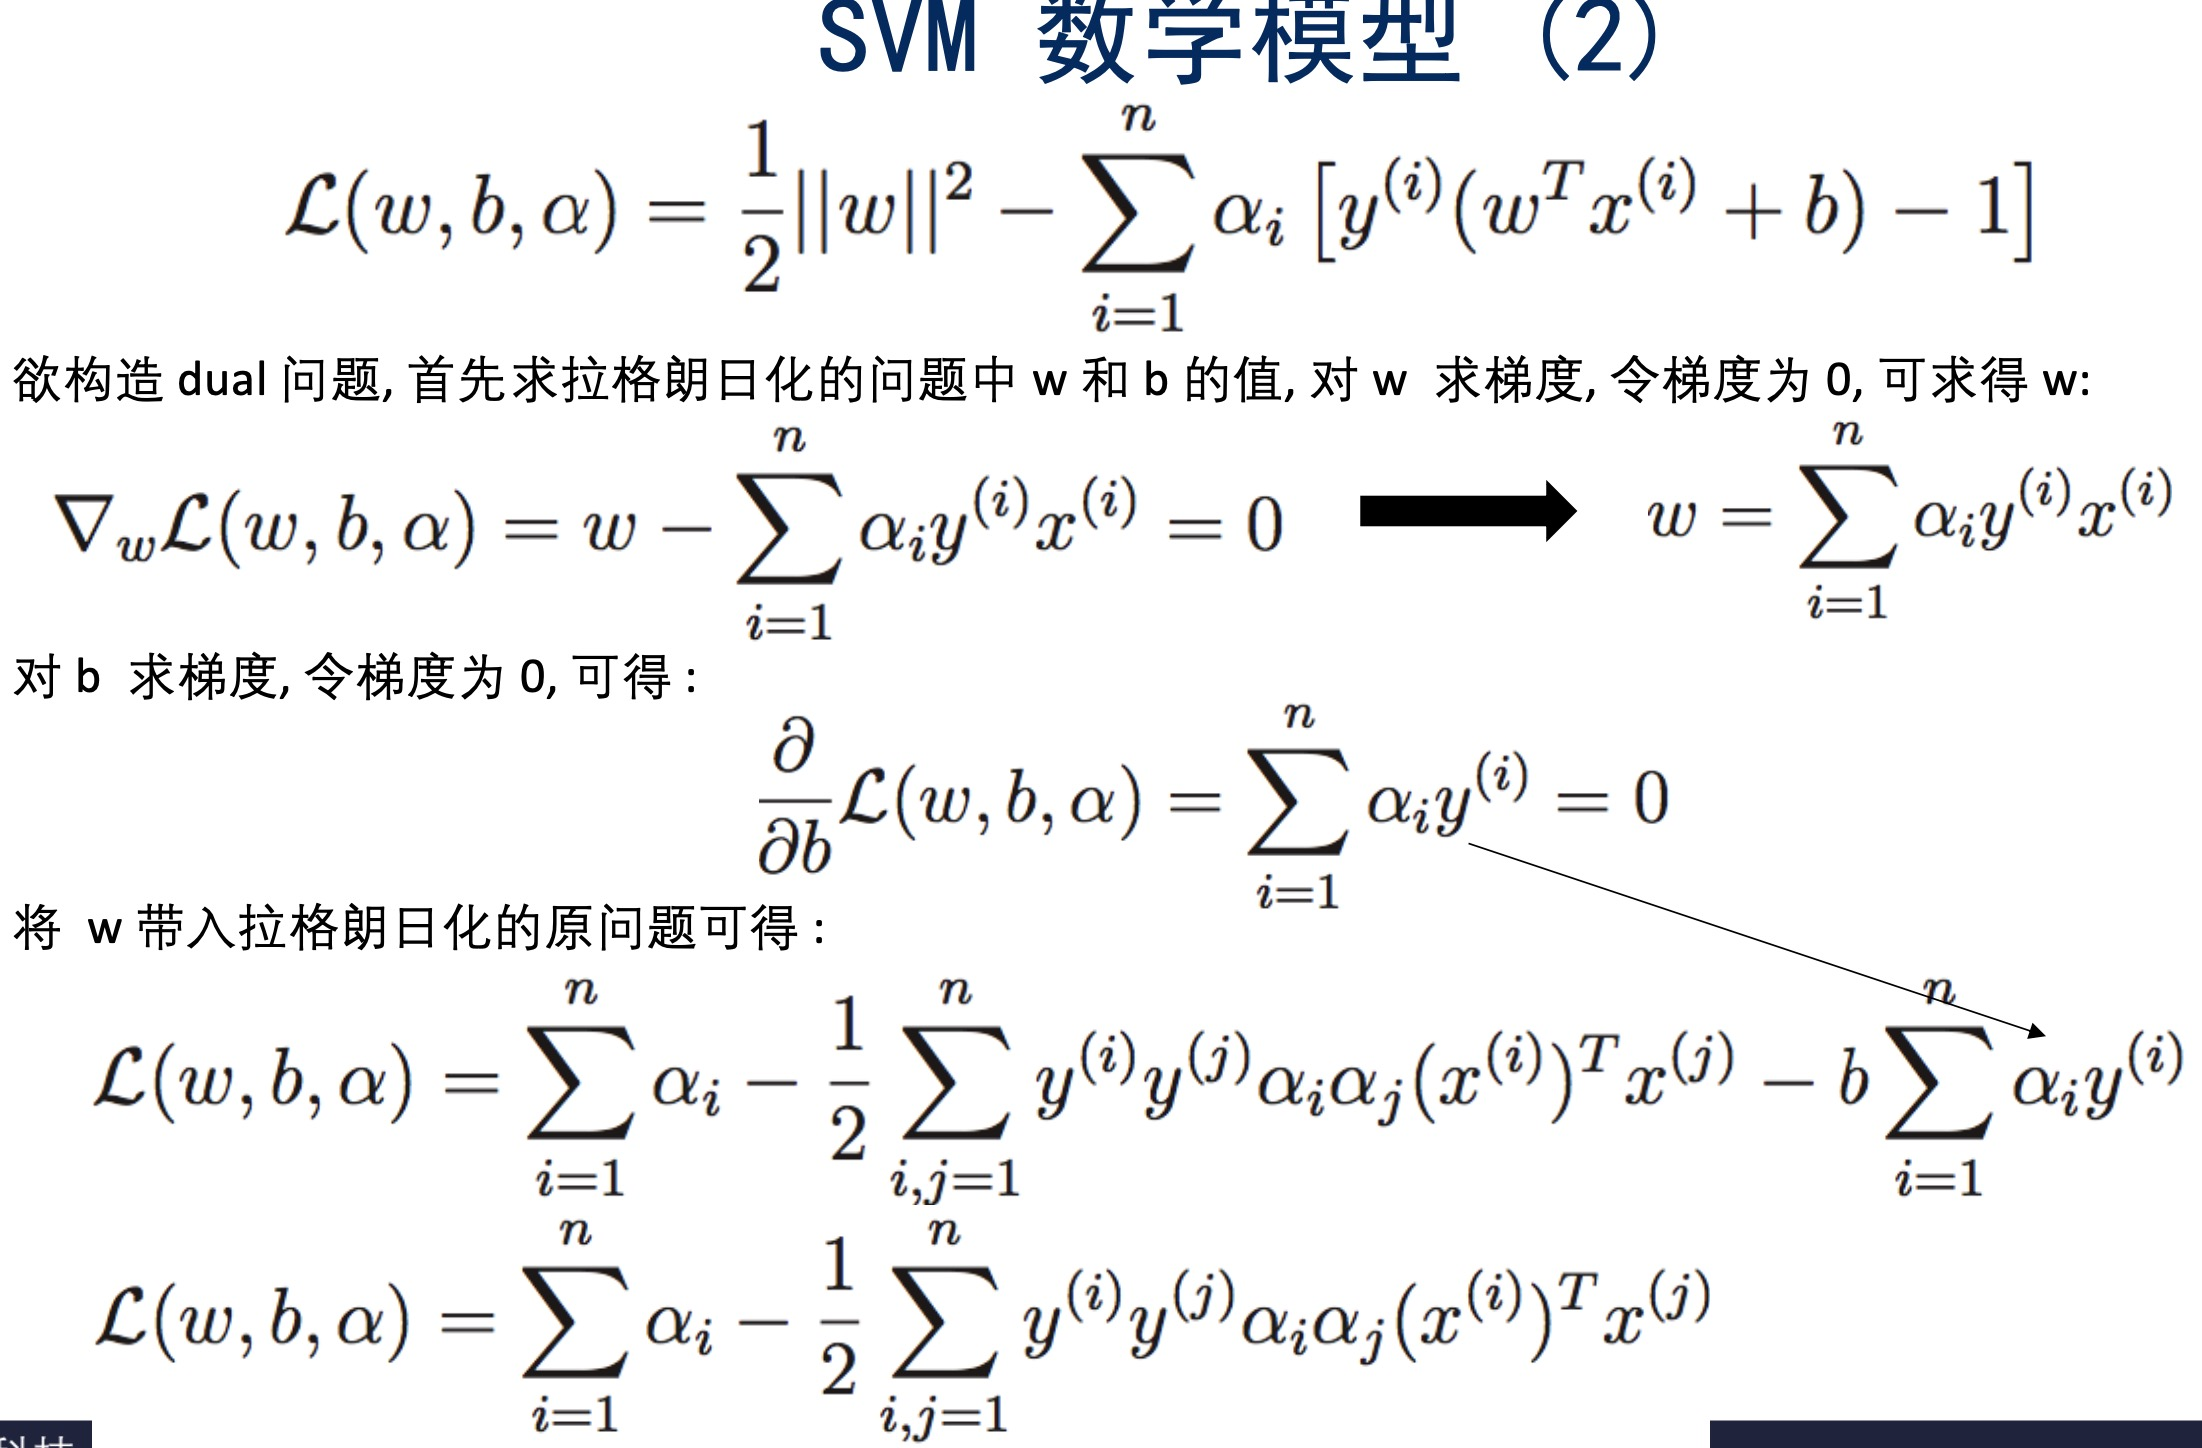
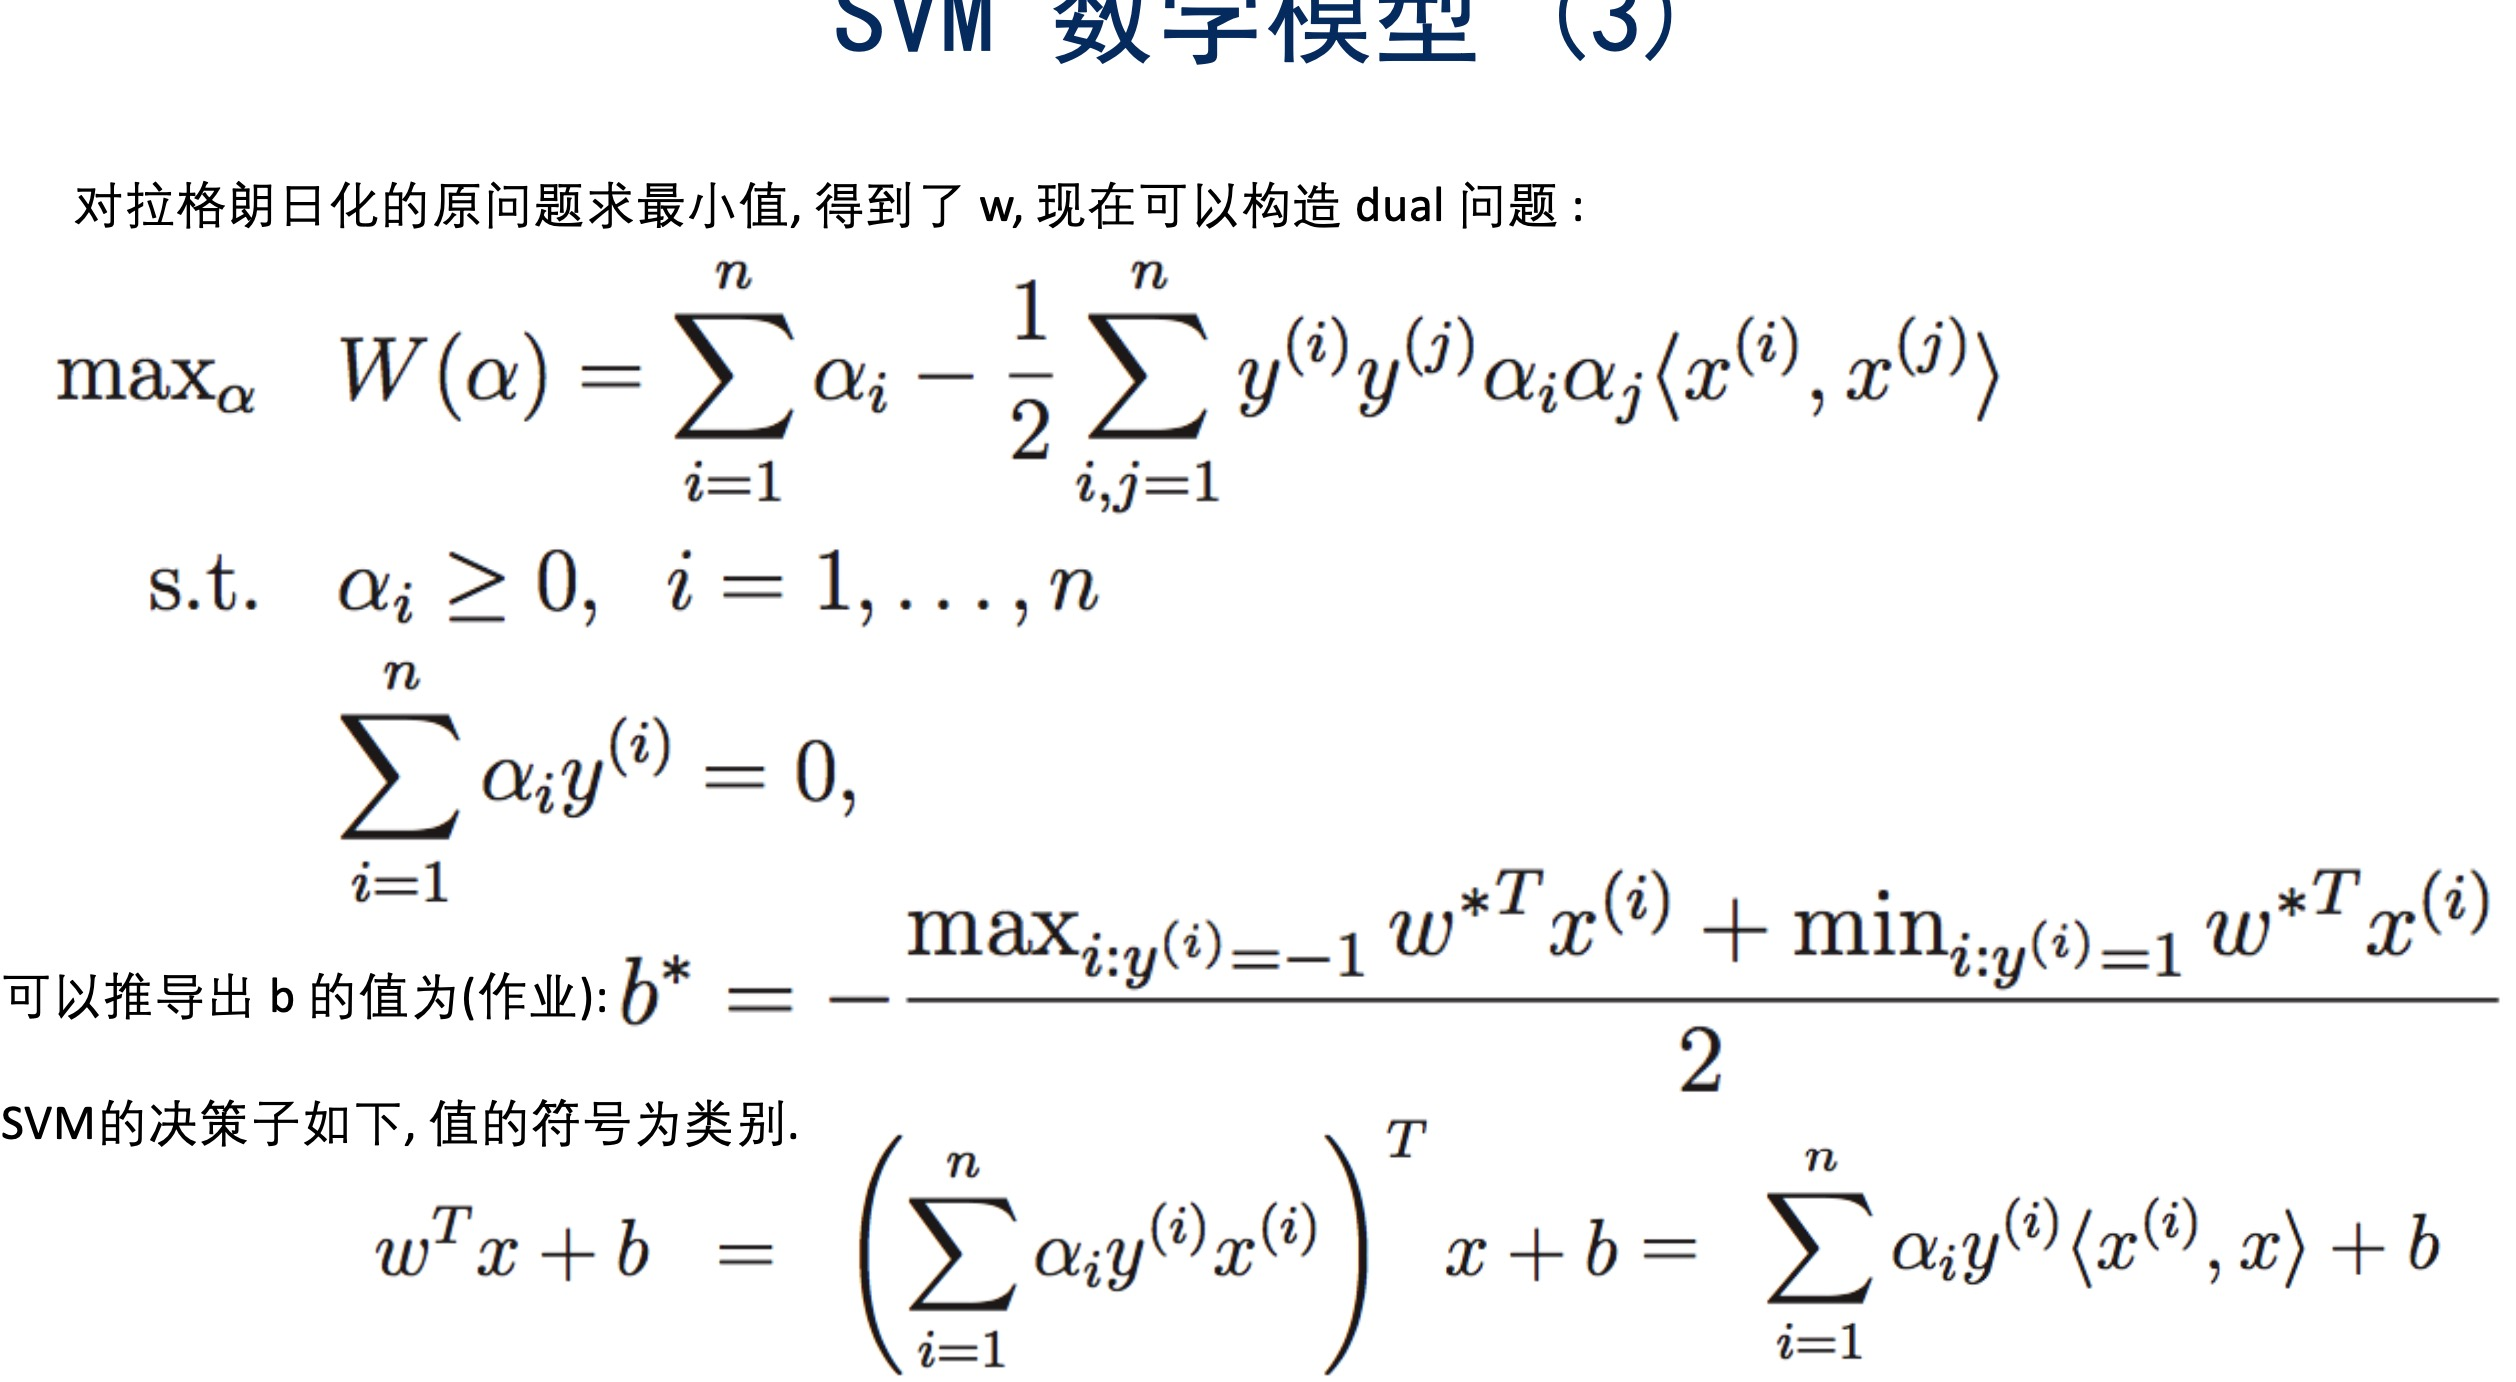

### 真实世界中带有异常值的线性SVM(带有松弛变量的SVM)
![svm-with-slack-variable1.png](assets/svm-with-slack-variable1.png)

![svm-with-slack-variable2.png](assets/svm-with-slack-variable2.png)

![svm-with-slack-variable3.png](assets/svm-with-slack-variable3.png)

![svm-with-slack-variable4.png](assets/svm-with-slack-variable4.png)
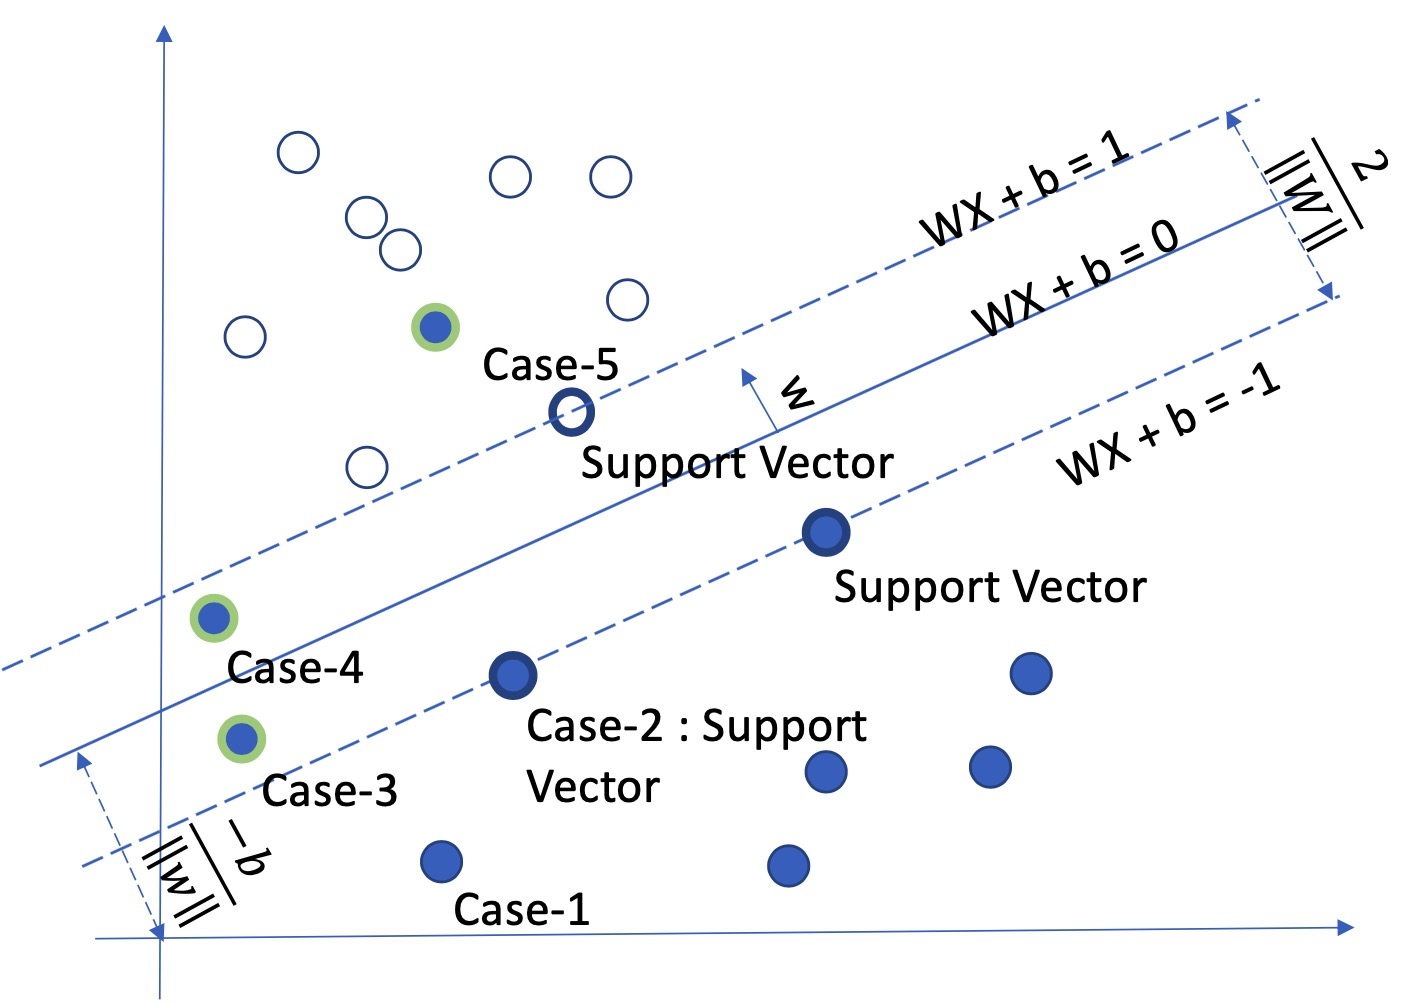
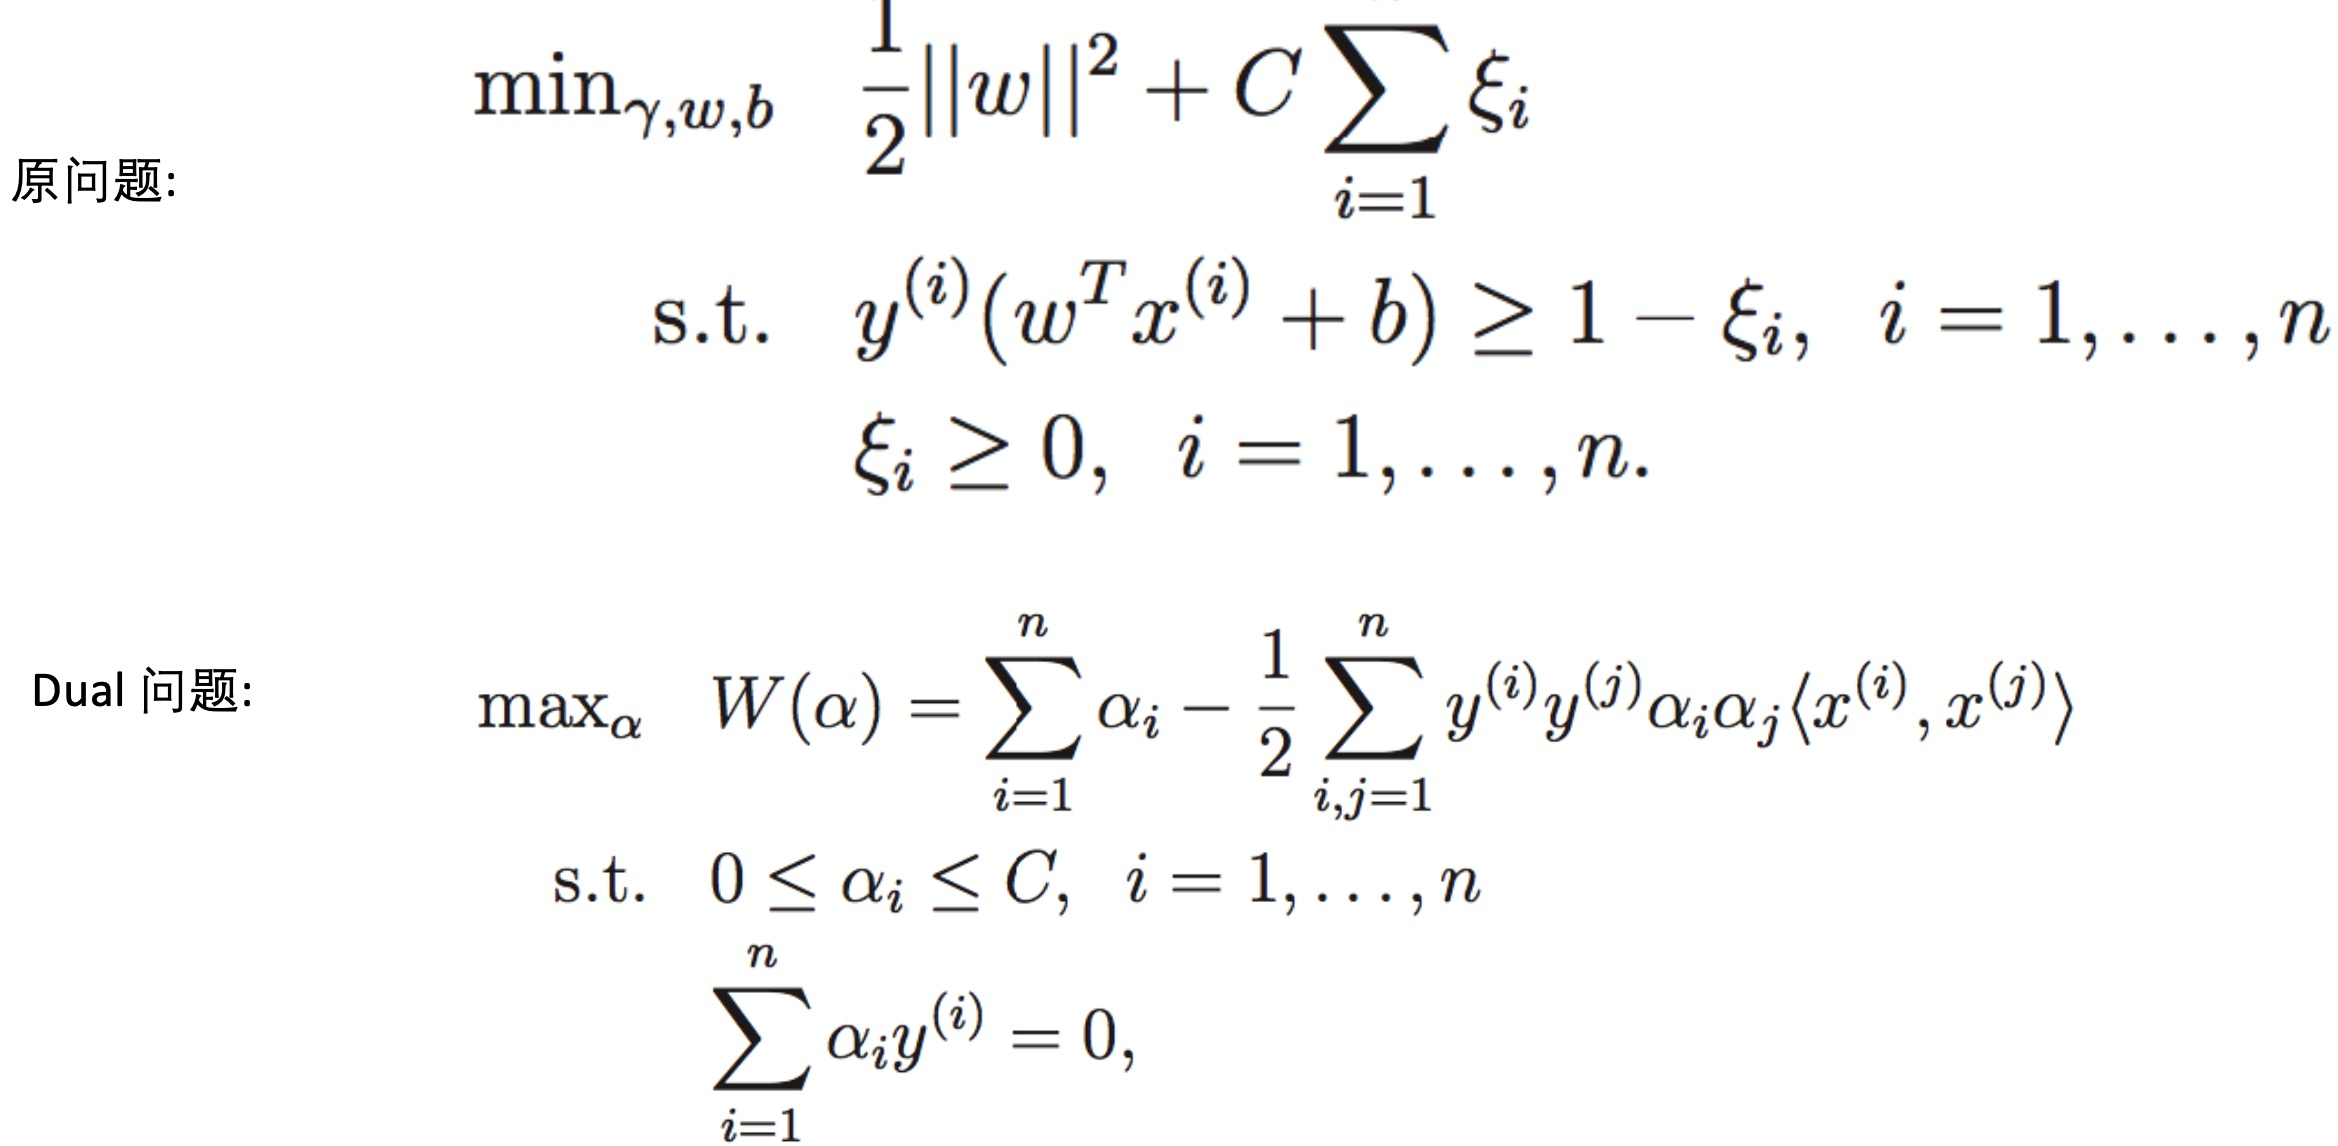
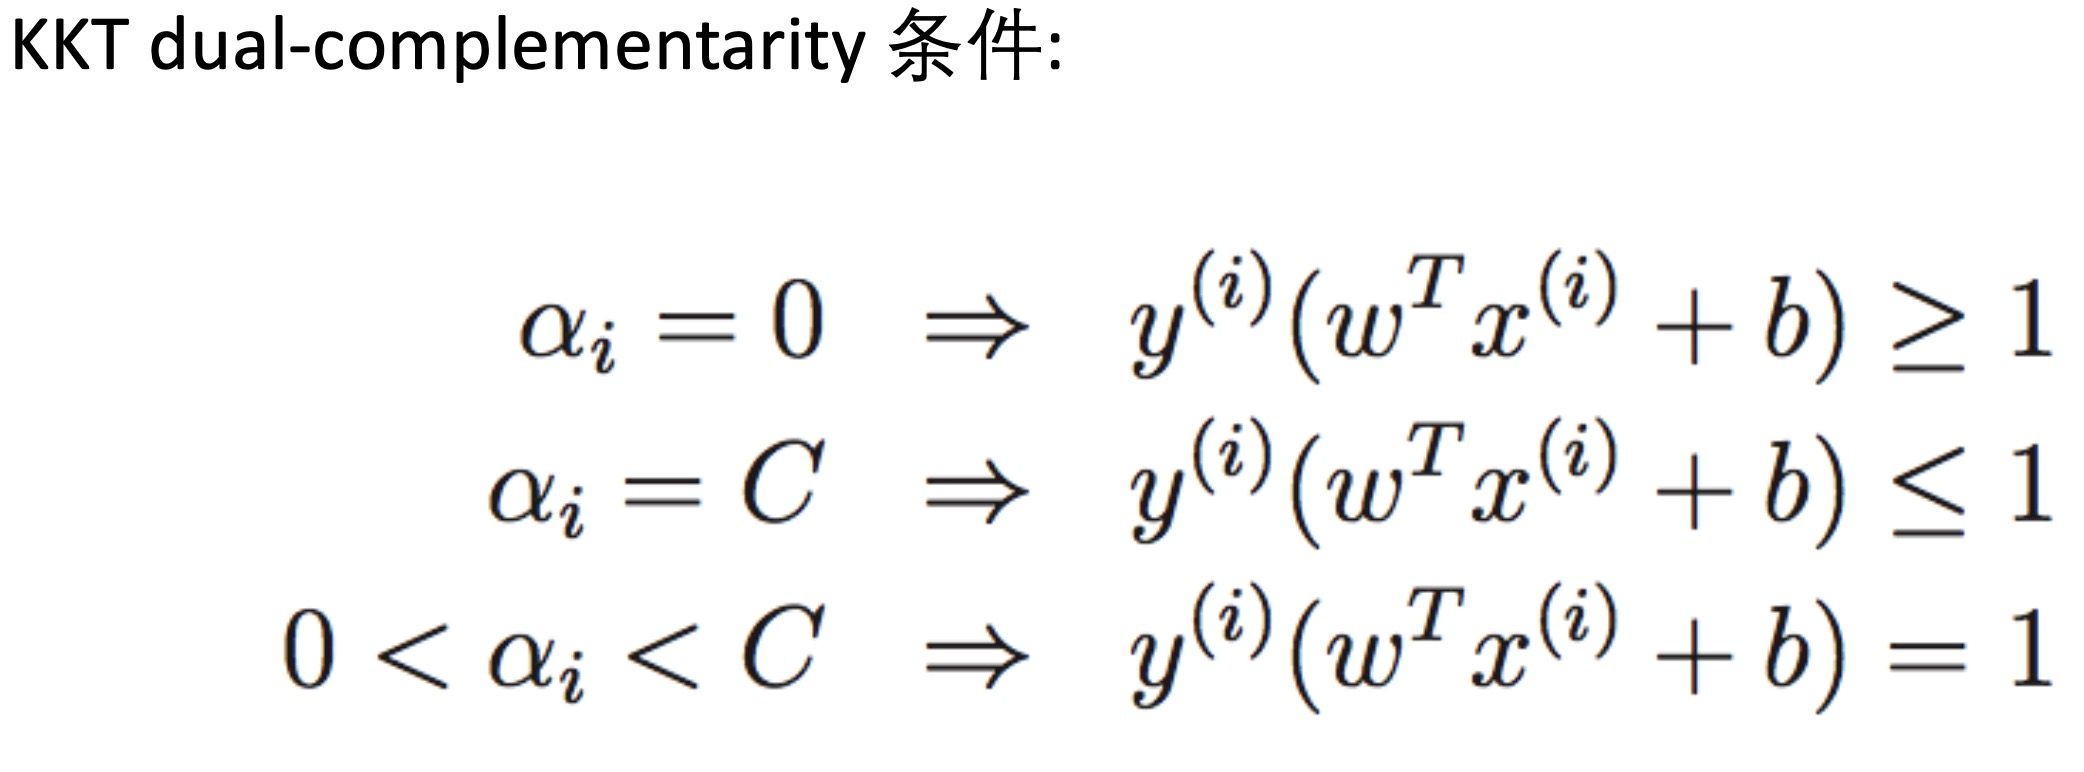
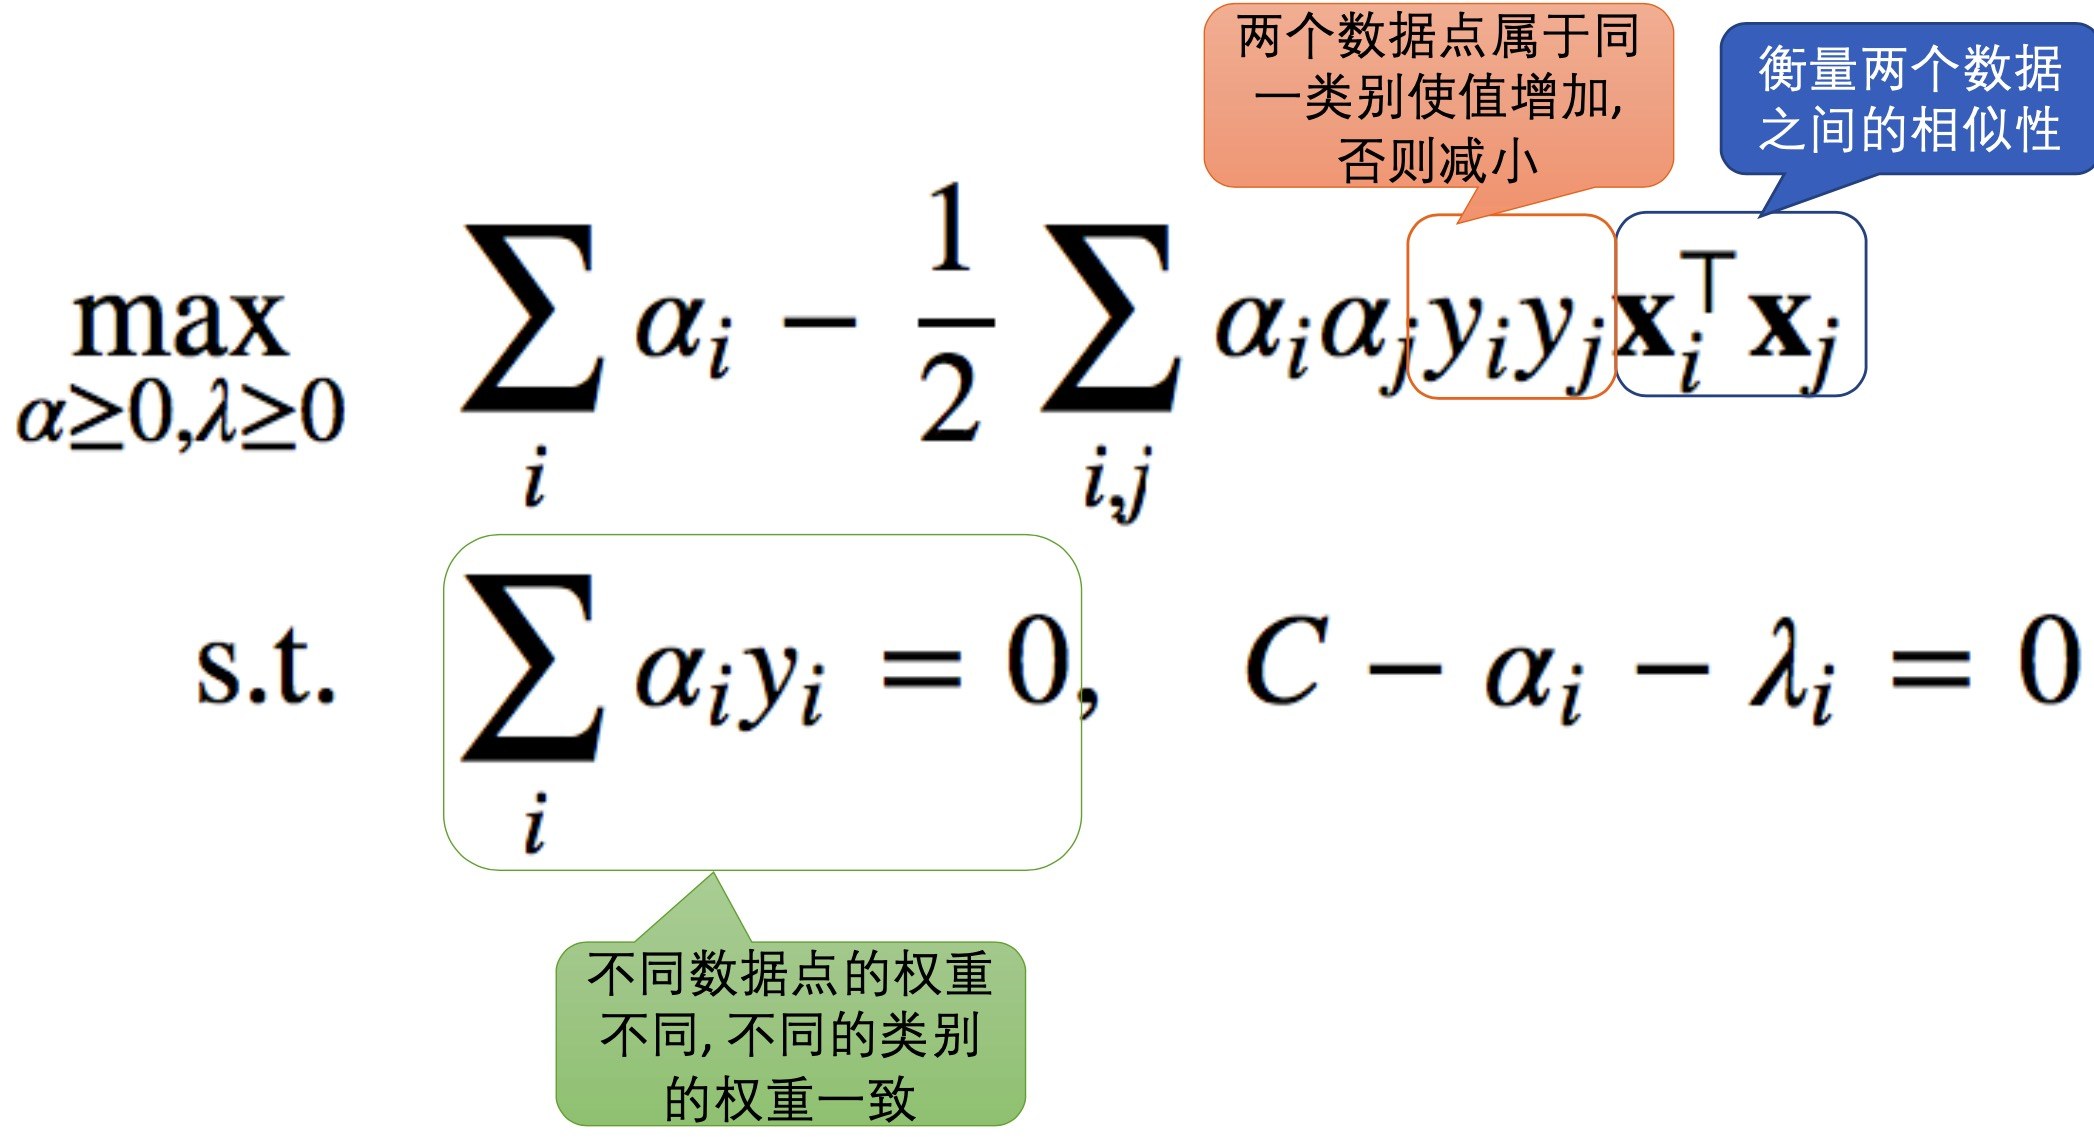

### SVM的另一种推导方式(Hinge Loss合页损失函数)

### 使用核函数的SVM(处理线性不可分问题)
![svm-with-kernel1.png](assets/svm-with-kernel1.png)

![svm-with-kernel2.png](assets/svm-with-kernel2.png)

![svm-with-kernel3.png](assets/svm-with-kernel3.png)

![svm-with-kernel4.png](assets/svm-with-kernel4.png)

![svm-with-kernel5.png](assets/svm-with-kernel5.png)

![svm-with-kernel6.png](assets/svm-with-kernel6.png)

![svm-with-kernel7.png](assets/svm-with-kernel7.png)

![svm-with-kernel8.png](assets/svm-with-kernel8.png)

![svm-with-kernel9.png](assets/svm-with-kernel9.png)

![svm-with-kernel10.png](assets/svm-with-kernel10.png)

更多的核函数：
- sigmoid kernel
    - 相当于一个没有隐层的简单神经网络
- cosine similarity kernel
    - 常用于衡量文字相似性
    - 两个向量的余弦相似度
- chi-squared kernel
    - 常用于计算机视觉
    - 衡量两个概率分布的相似性
    - 输入数据是非负的，并且使用L1归一化    
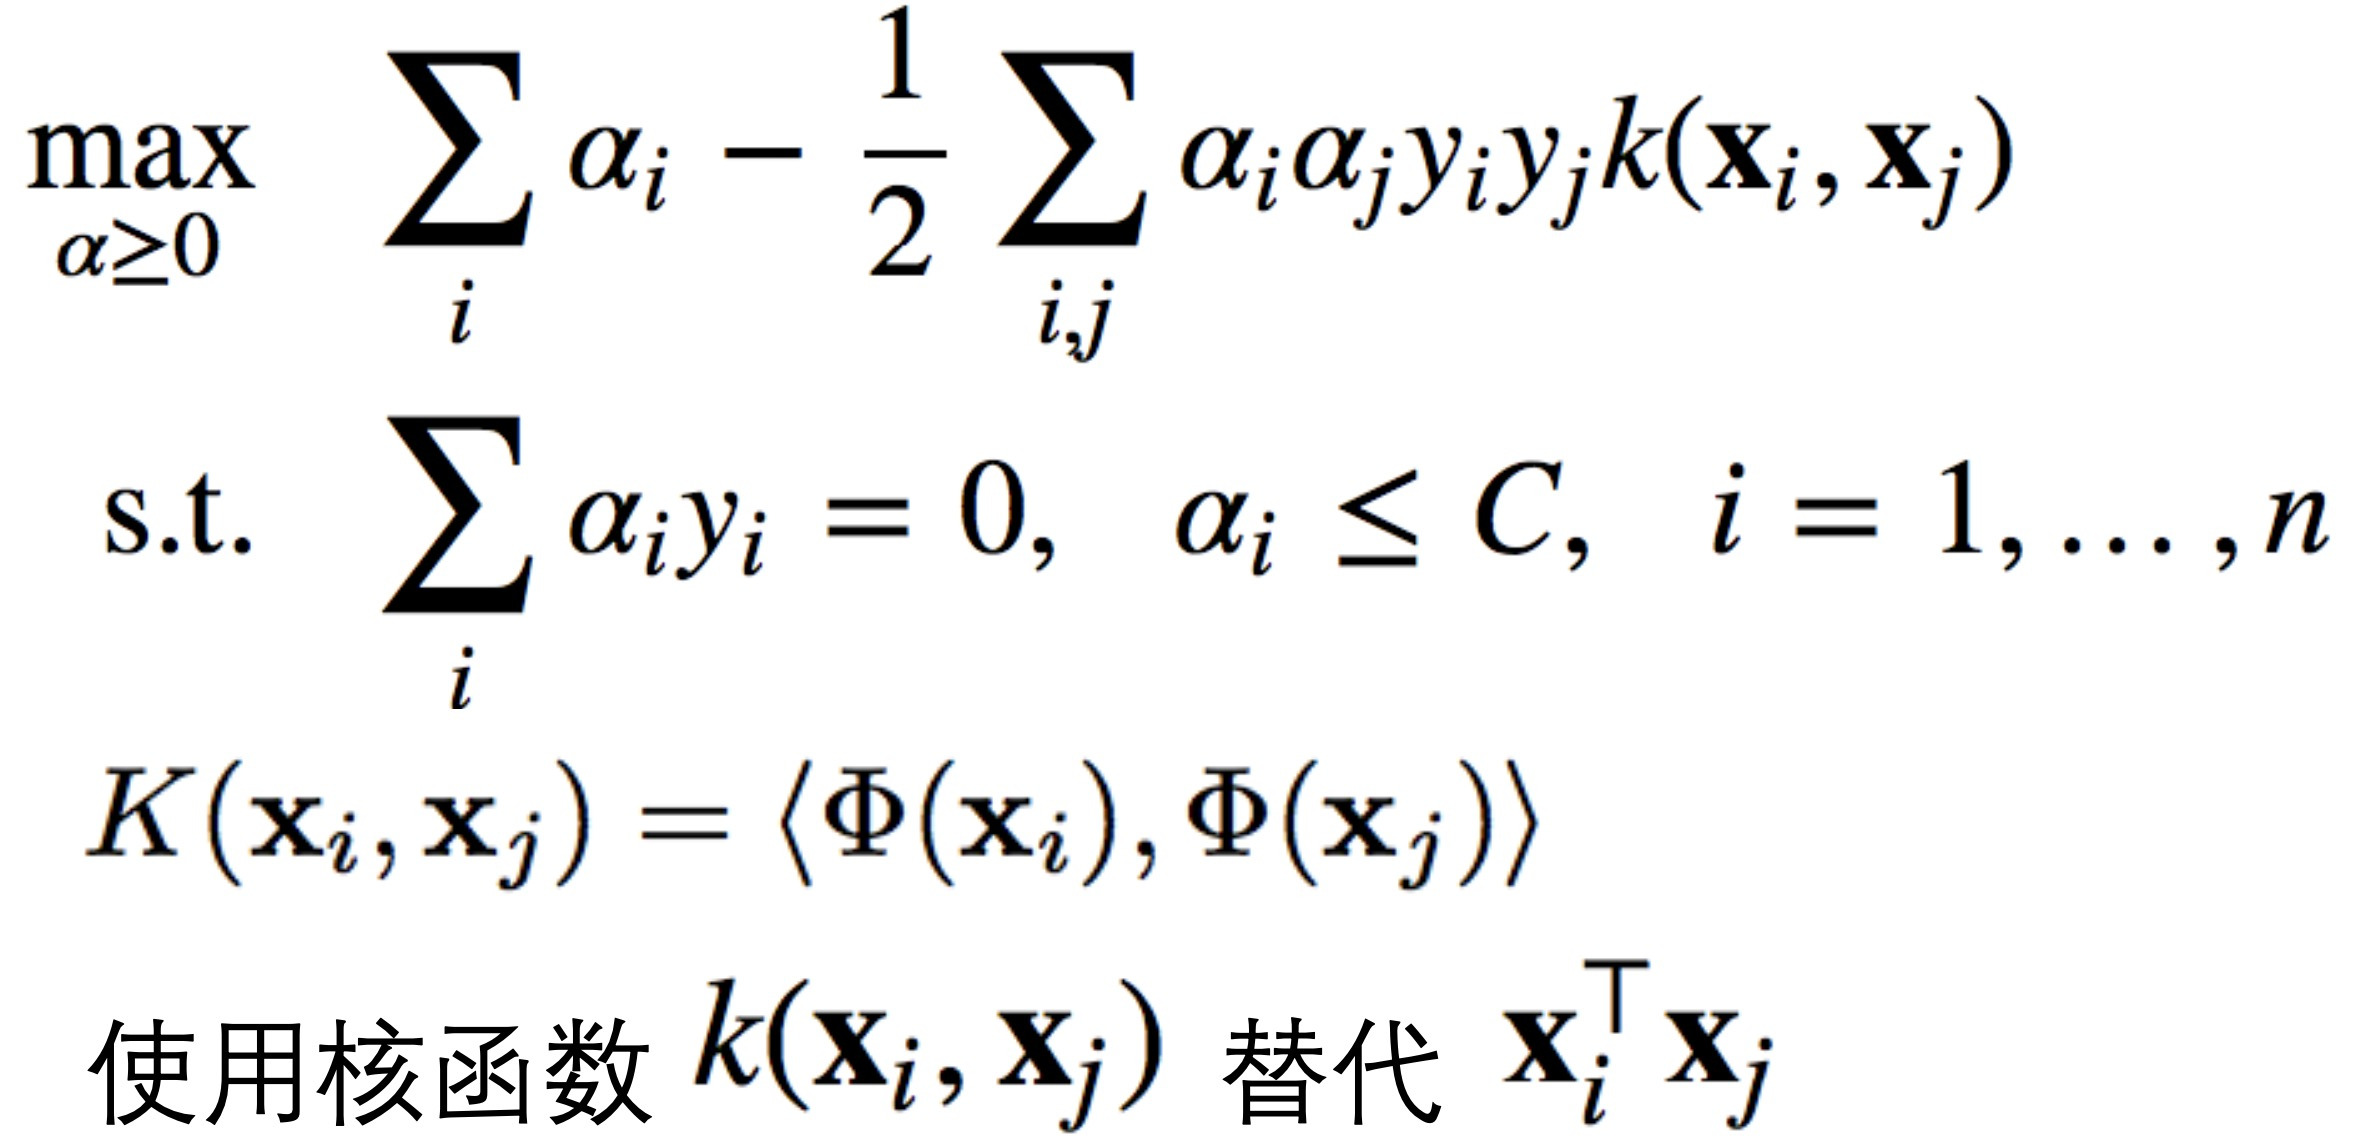
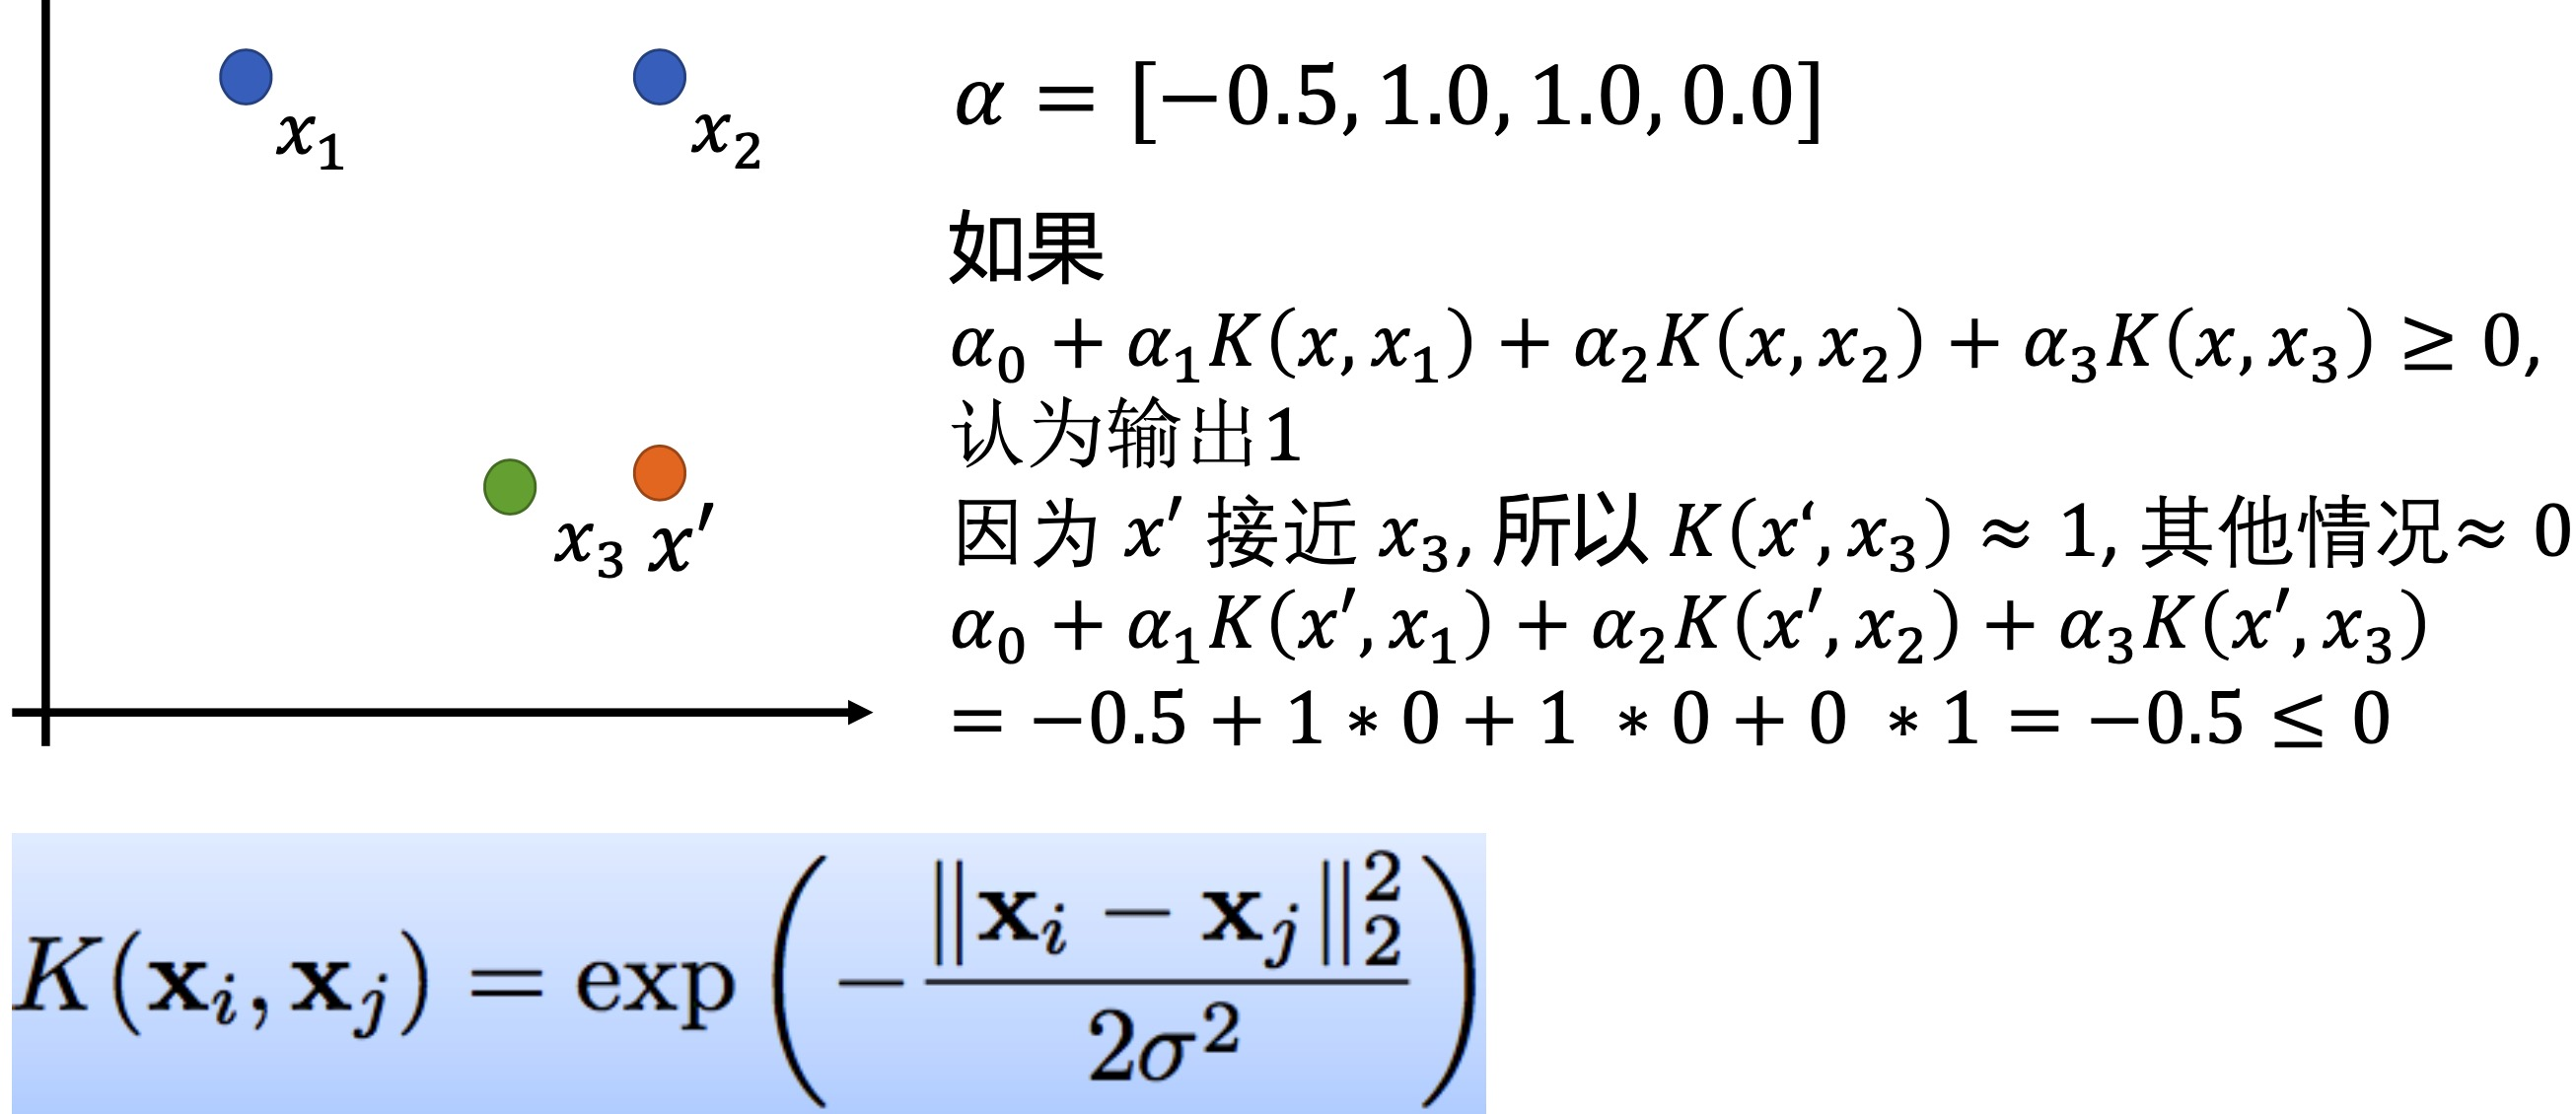
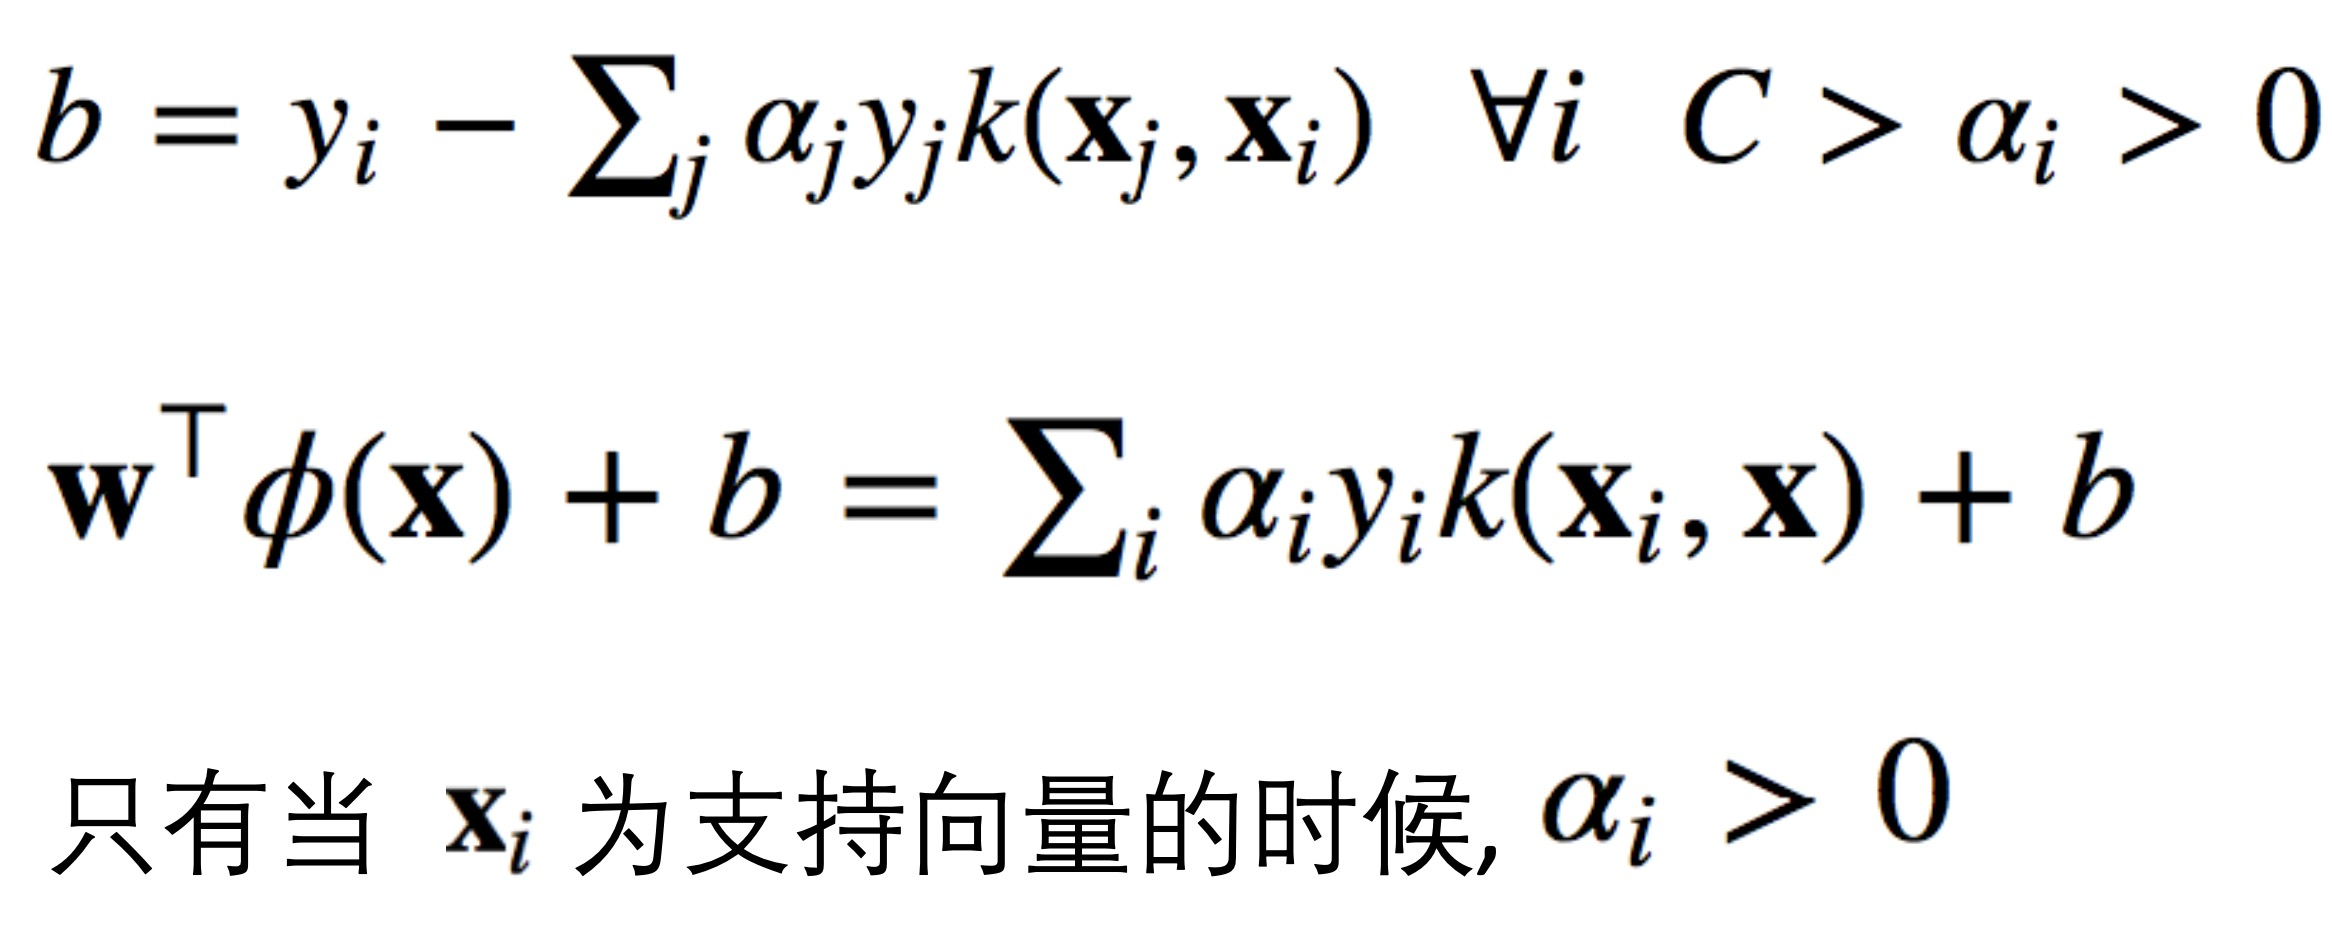
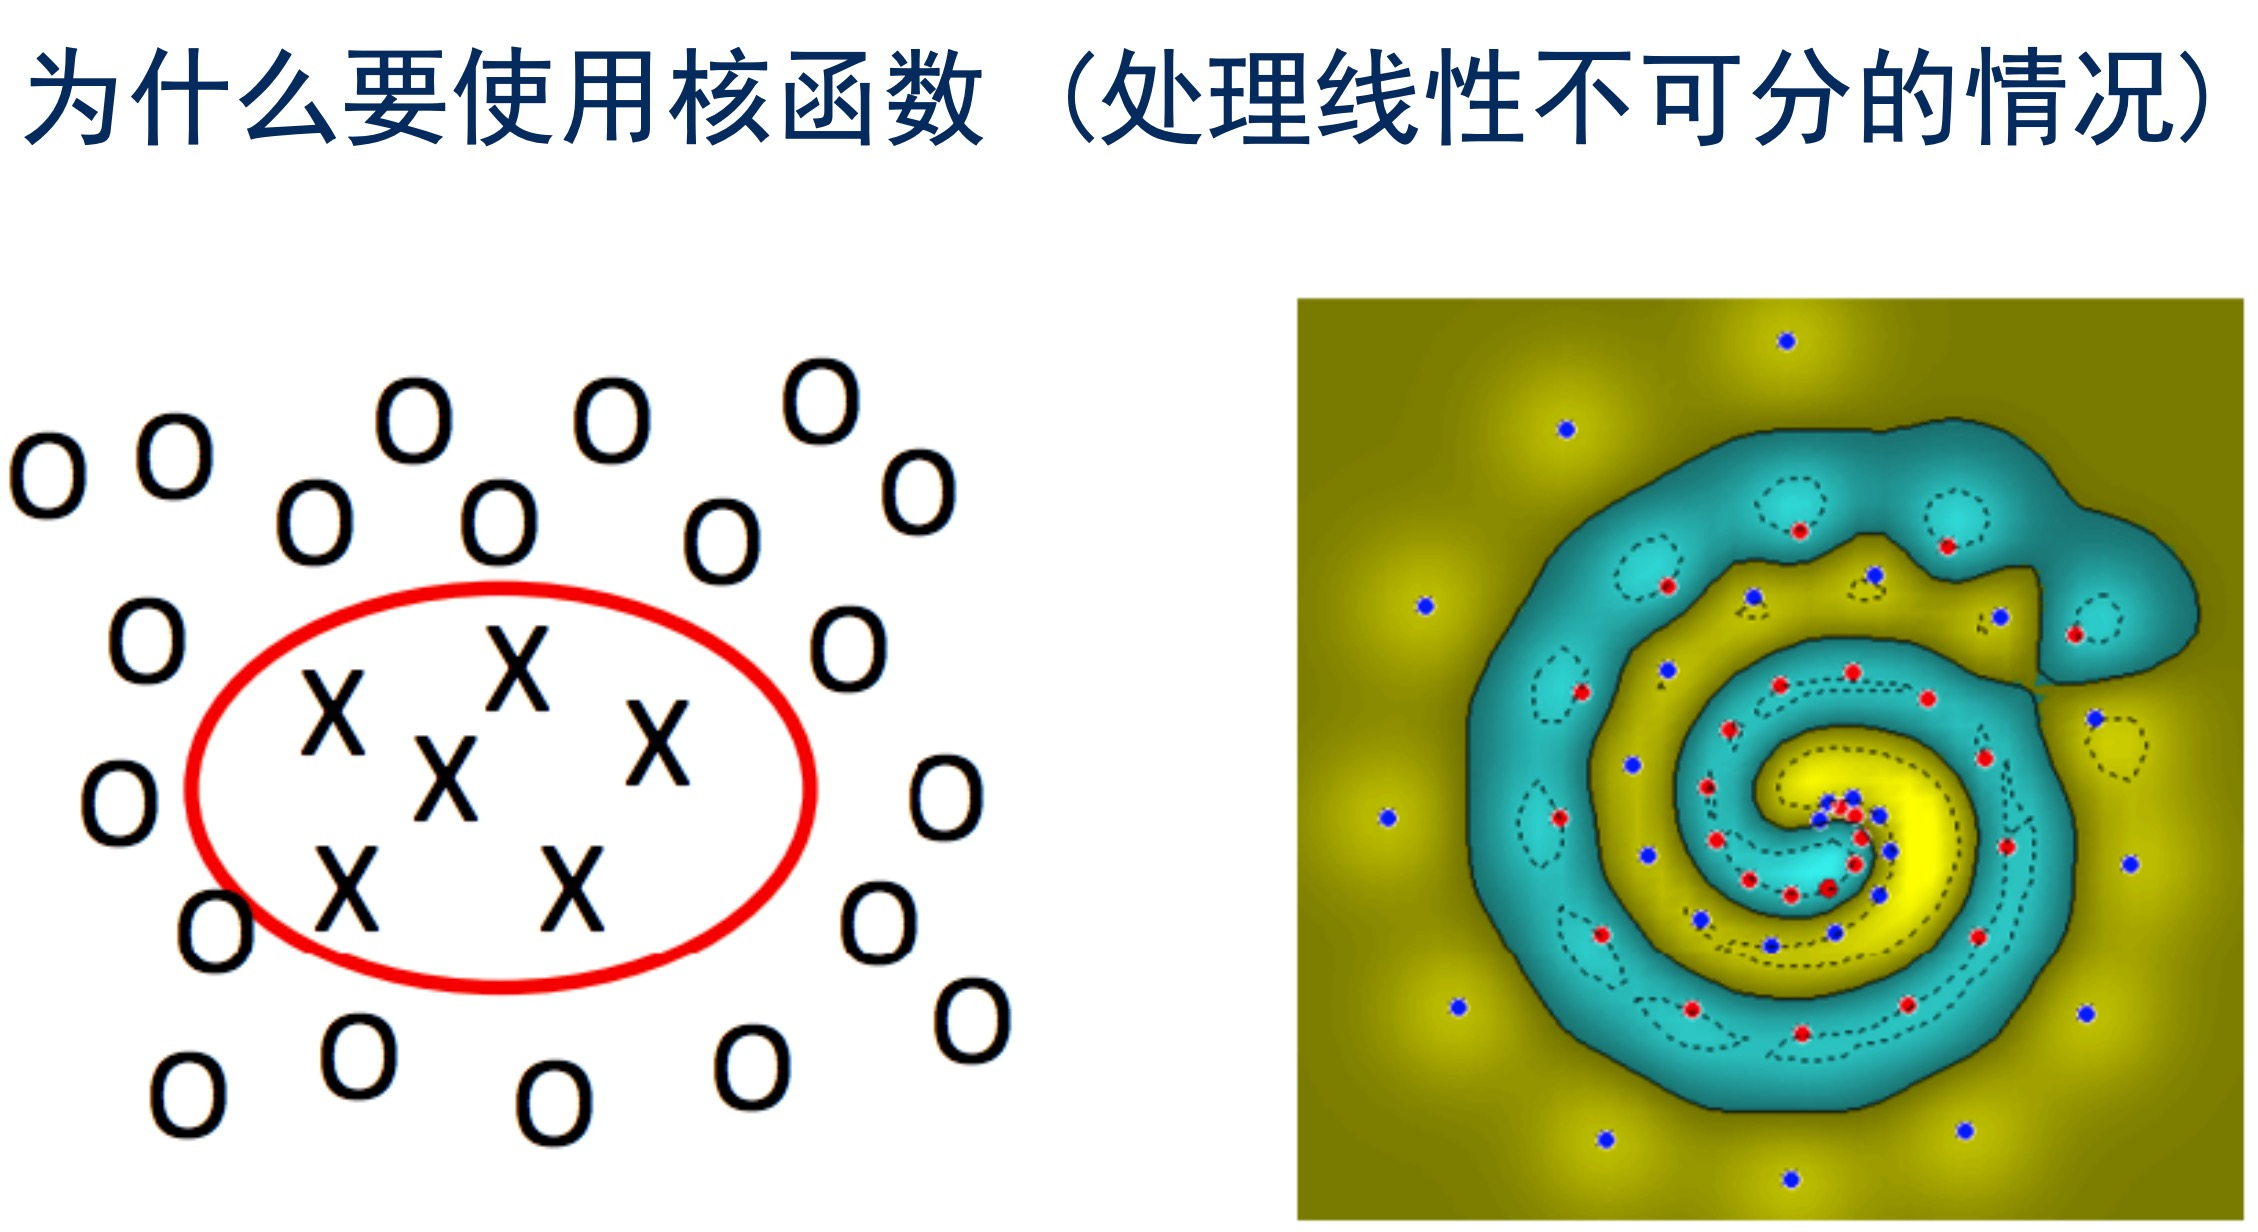
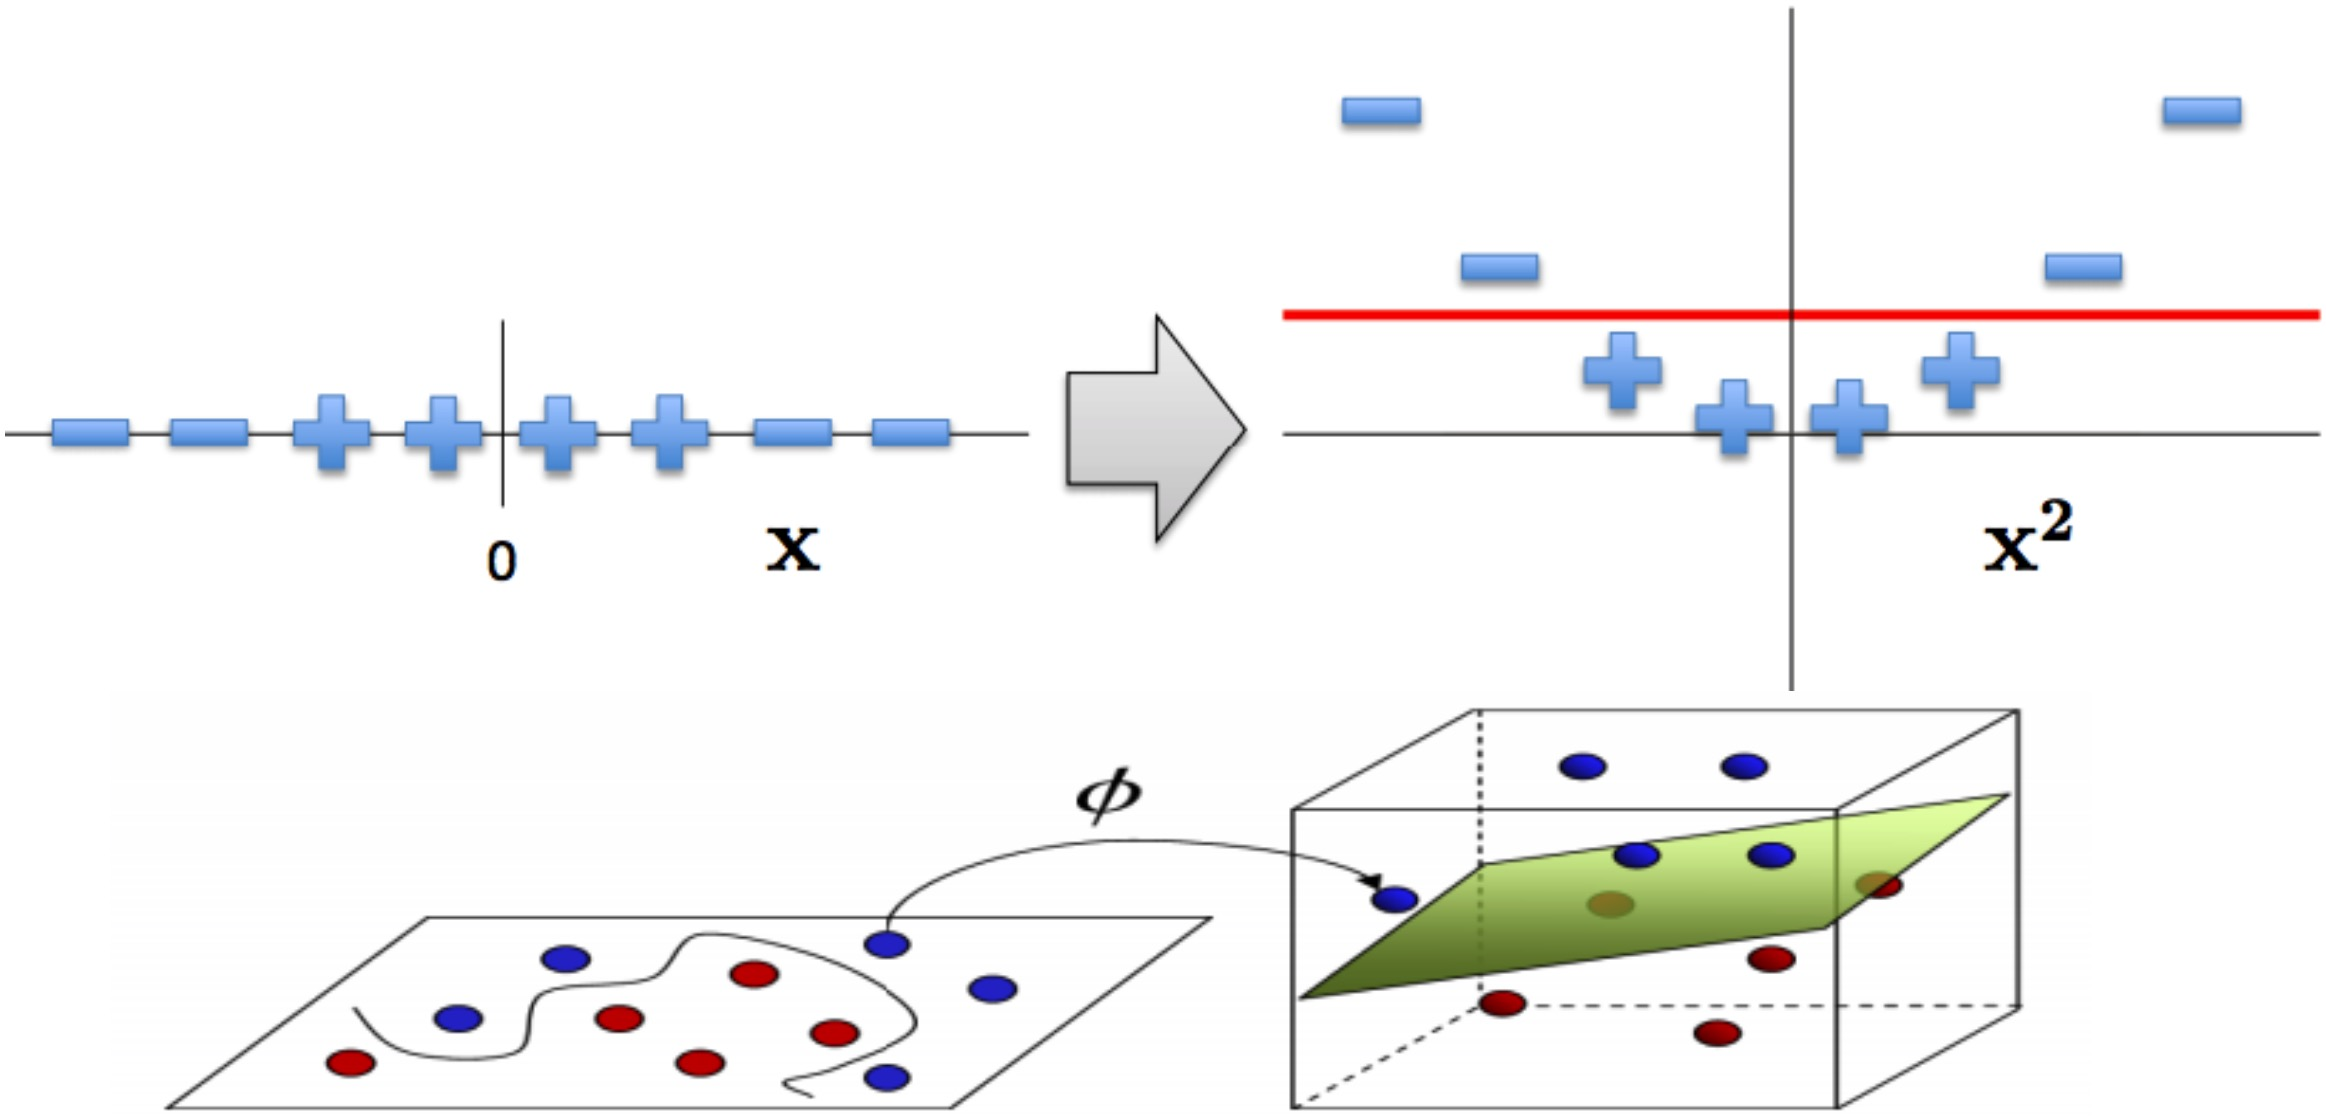
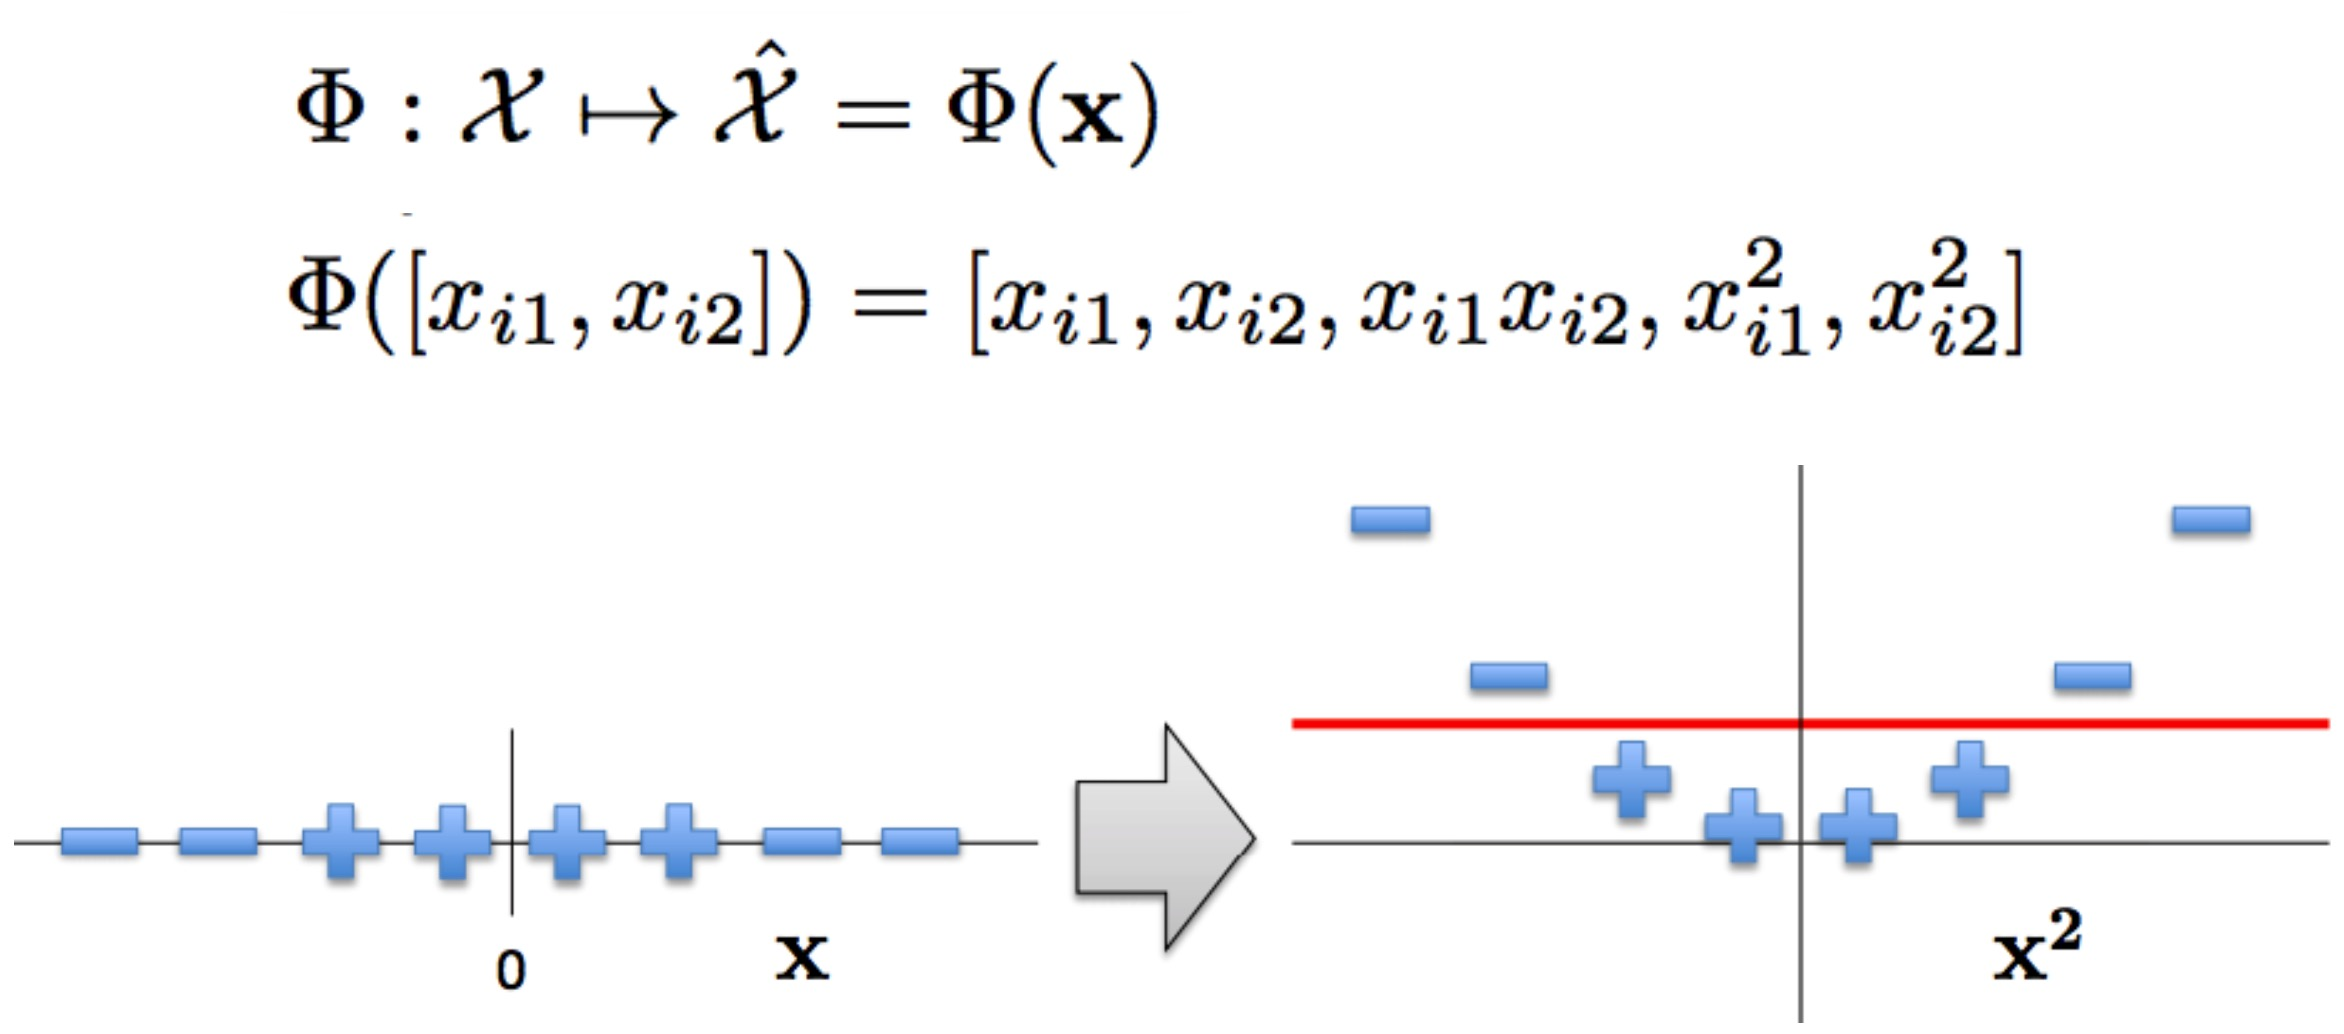
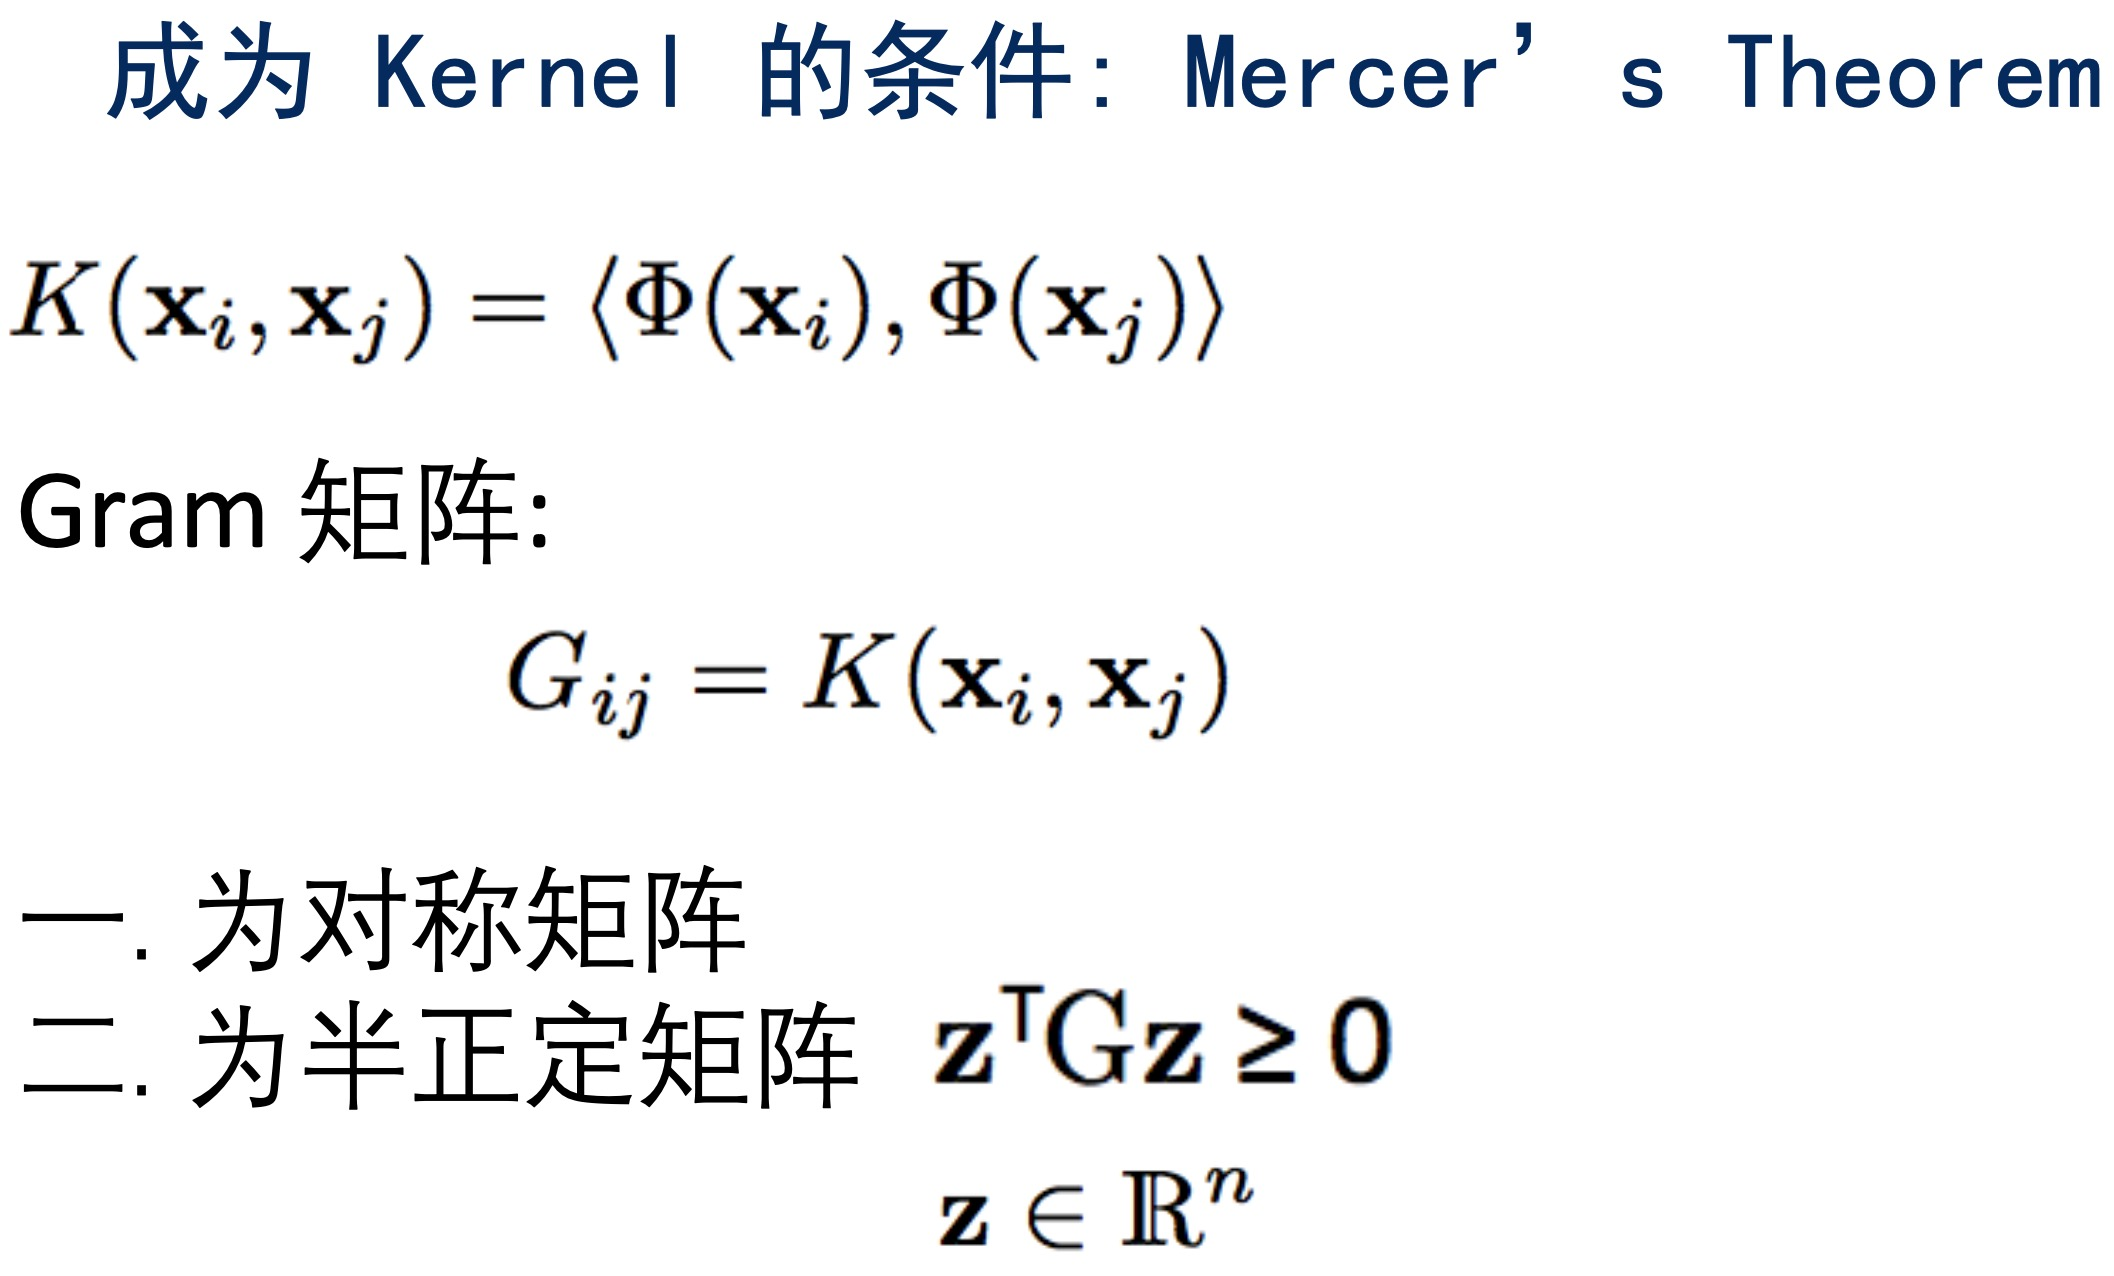
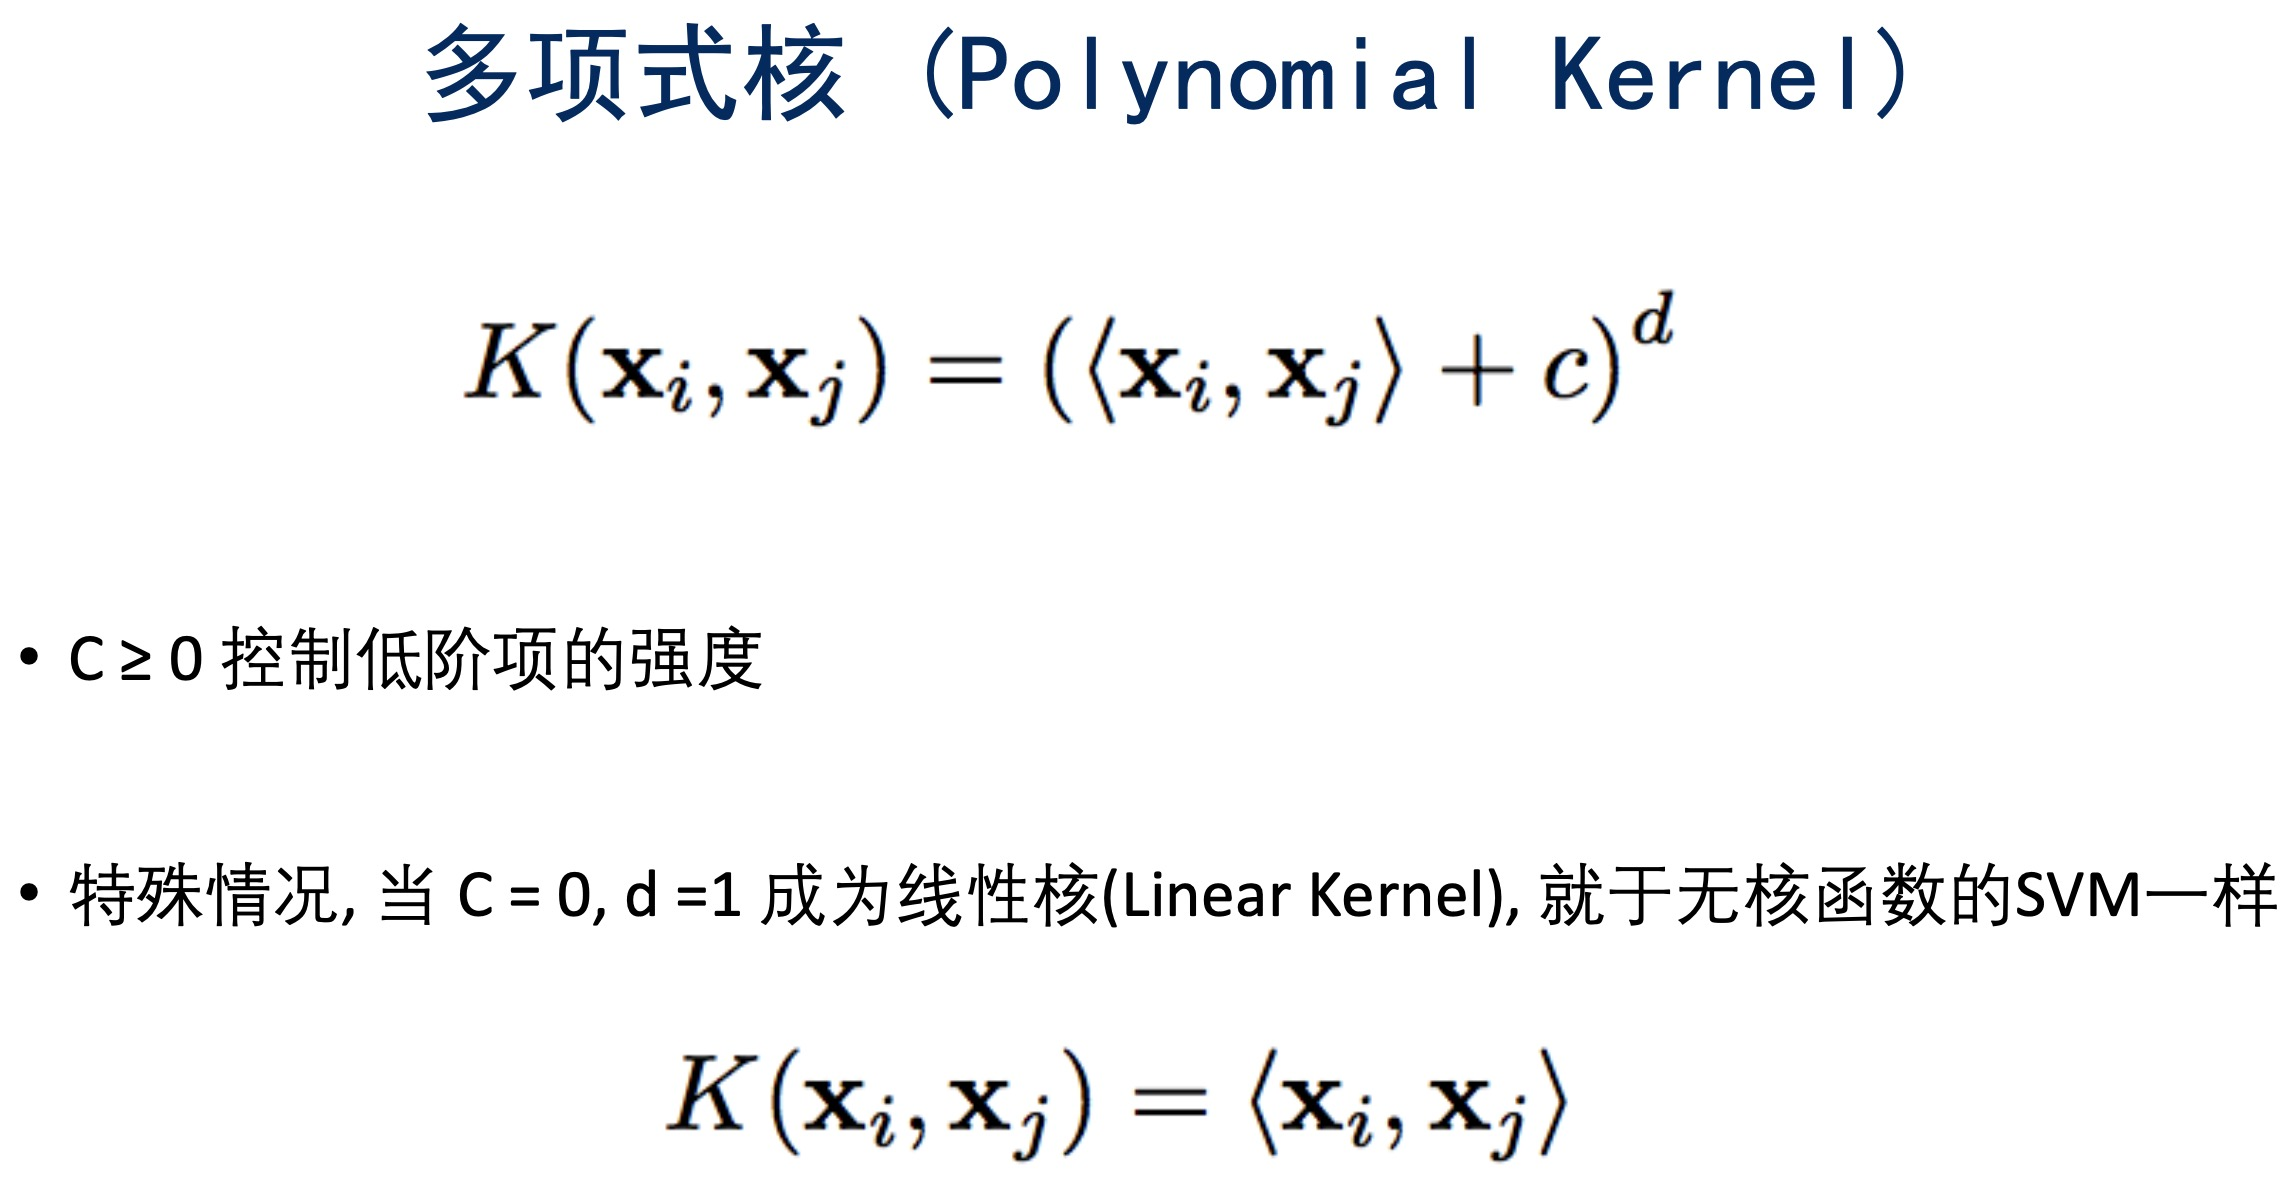
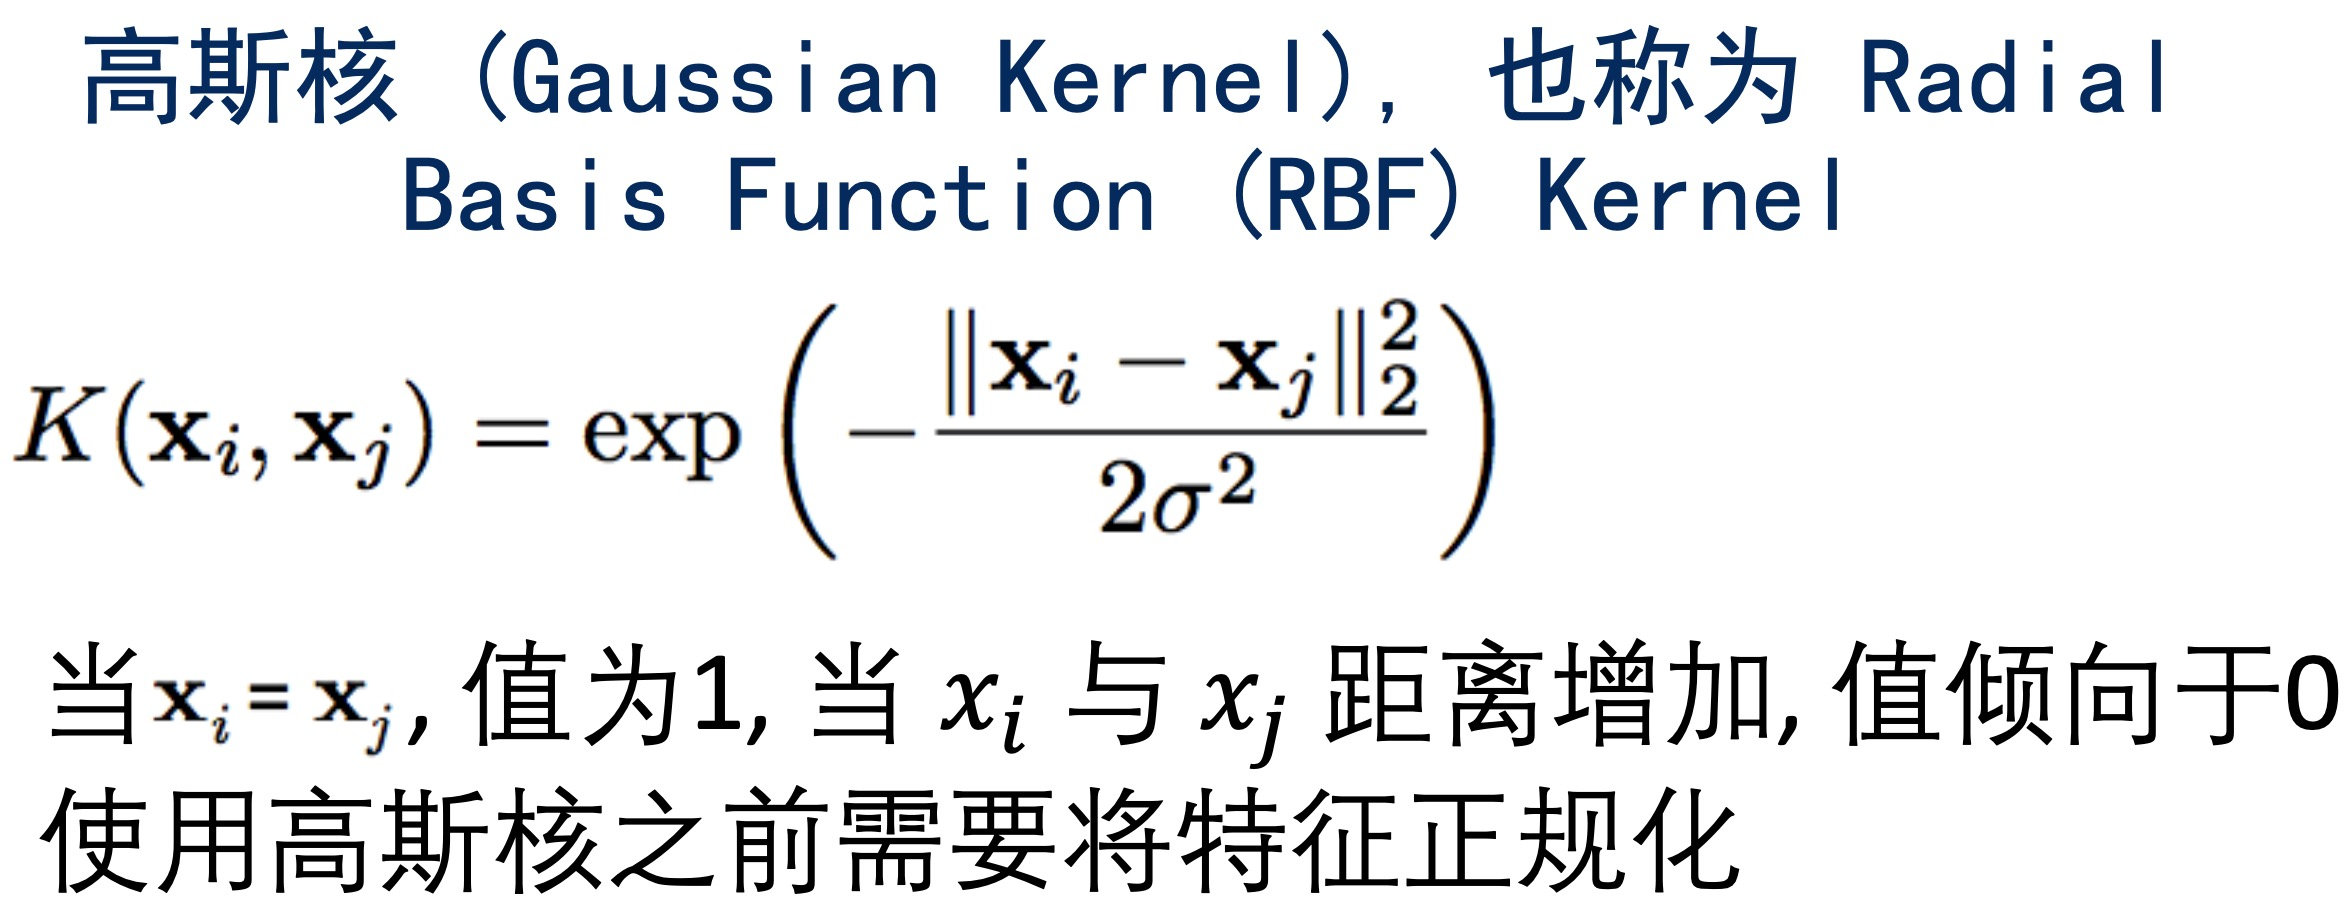
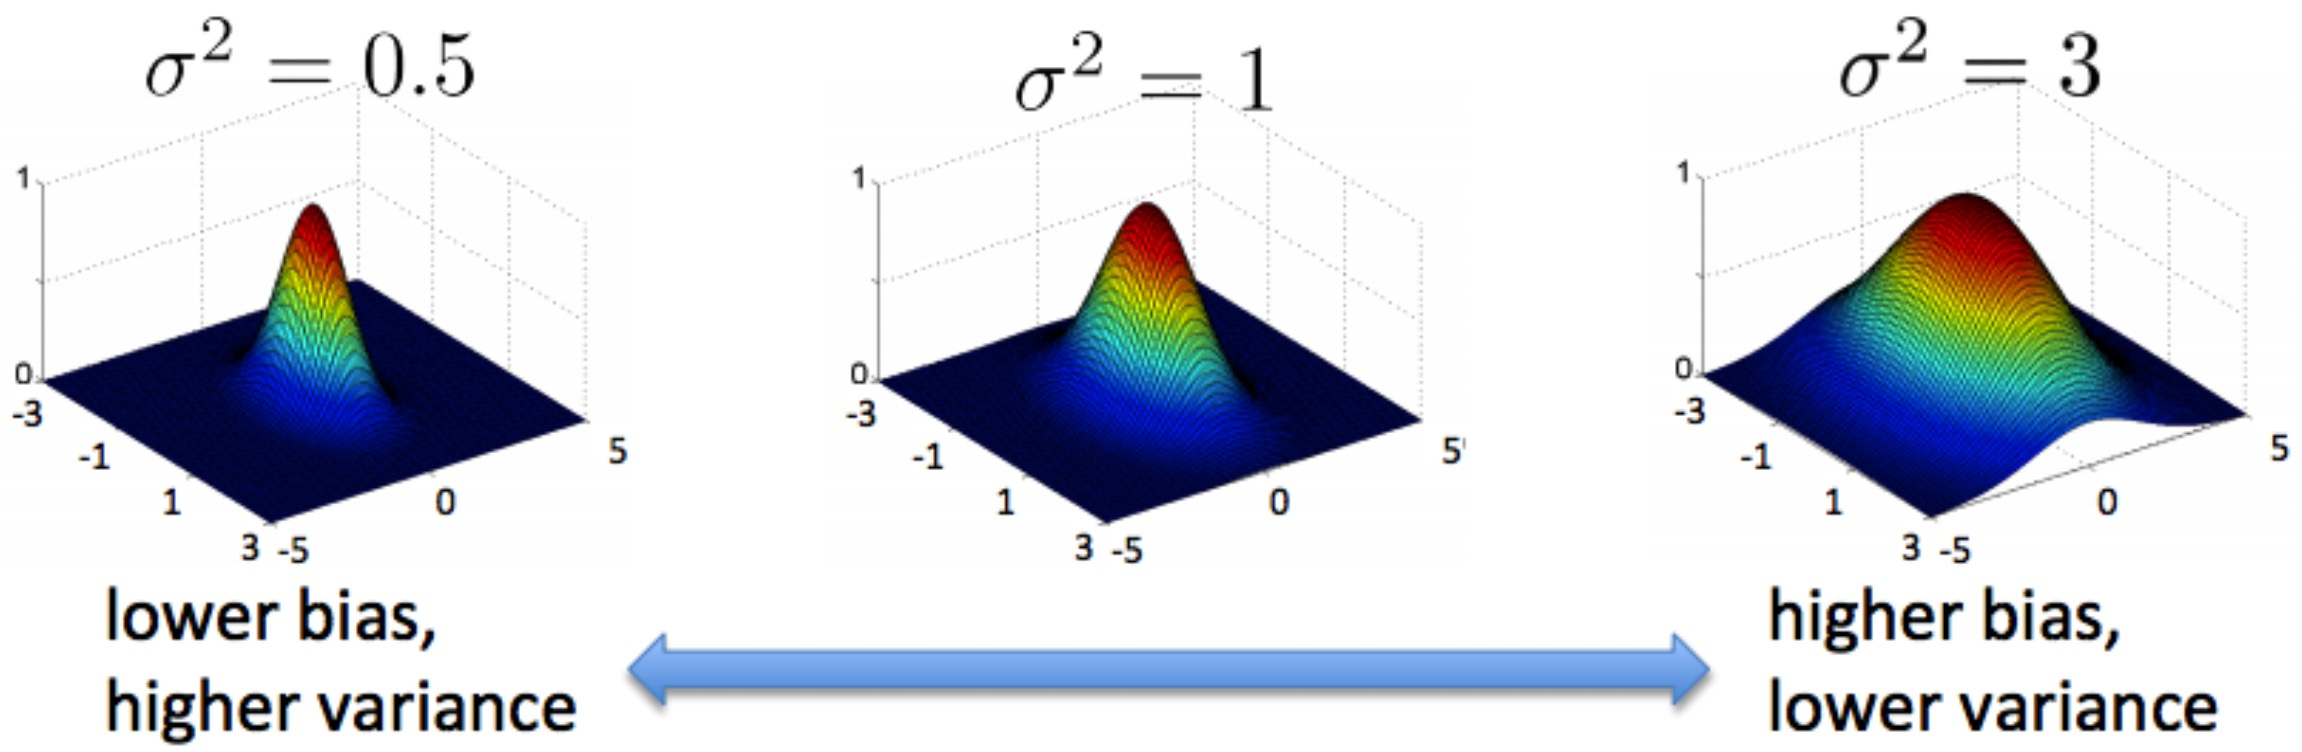

### SVM的求解

- 二次回归
- SMO

### SVM处理多分类问题
- OVR
- OVO
- softmax

## KNN 回归/分类
## 核回归
在KNN的基础上，根据距离的不同进行加权计算

## Underfitting/Overfiting and Bias/Variance

**Overfitting:**主要看loss曲线，如果发现loss下降的非常快，并且下降到非常小，小到超出我们的经验值。并且模型在validation上的loss并不够好，说明有可能是过拟合了。

**Underfitting:**也是看loss曲线，发现曲线下降很慢，并且下降到的值也很小，那有可能是欠拟合的，我们需要去提供模型的复杂度。

**Bias：**模型预测值和真实值的差异。给定包含n个数据的数据集D，在不同的数据集D上训练处不同的模型。
- Bias是指期望值和真实值之间的差异。
- 在测试集上的error很高

**Variance：**更换训练数据时，模型的变化情况。给定包含n个数据集D，在不同数据集上训练出不同的模型。
- Variance在不同数据集上训练的模型与所有模型期望的差异。
- 衡量模型对特定数据集的变化的敏感度。高Variance指的是在训练数据上拟合的太好，导致在测试集上不能取得很好的性能

我们期望的是Low Bias and Low Variance。

## 维度灾难

## 正则化（Regularization）
**正则化：**对机器学习算法的任何修改，以减少其泛化错误(generalizaiton error)，但并不减少其训练错误(training error)。能够减少overfitting。泛化错误指的是没有出现过得数据的预测结果与真实的差距。

**Cost function = Loss + Regularization term**，常用的是Norm方法。

L1 Norm -> Lasso Regresion：
- 不容易求导，求零点连续但不可导，需要分段求导
- 可以将一些权值缩小到零（稀疏）
- 执行隐式的变量选择，意味着一些变量值对结果的影响将为零，就像删除它们一样
- 其中一些预测因子对应比较大的权值，而其余的（几乎）归零
- 当特征数量巨大的时候首选的方法，可以大大降低计算资源
- 它任意选择相关特征中的一个，并将其系数减少到零
- 与脊回归(ridge regression)相比，通常性能会有所下降
- L1对于异常值的抵抗力会比较强

L2 Norm -> Ridge Regresion：
- 容易计算，可导，适合基于梯度的方法
- 将一些权值缩小到0
- 相关的预测特征对应的系数值会相似
- 当特征数量巨大时，计算量会比较大
- 当相关特征存在时，它会包含相关的特征（与L1比较），但是相关特征的权值分布取决于相关性
- 对异常值(outliers)非常敏感
- 相对于L1正则会更加精确

Lasso和Ridge的对比：
- Lasson和Ridge通常情况并没不是一个一定比另一个好
- 它们可以不同程度解决共线性的问题
- 当少量因子影响输出时，lasso效果更好
- 当有大量重要参数时，ridge效果更好
- 实践中，我们并不知道真正的参数值，我们需要记性交叉验证找到合适的方法

结合L1和L2，叫做Elastic Net。

## 梯度下降算法

批量梯度下降法
随机梯度下降法

小批量梯度下降法（结合以上两种方法的有点）